# Deep Learning Sentimental Analysis on Google Play Reviews using Long Short-Term Models (LSTM)

In [1]:
input_dir = 'netflix_reviews.csv'

In [2]:
import pandas as pd
df = pd.read_csv(input_dir)

In [3]:
df.head()

reviewId  \
0  3444e727-30f0-475f-9386-987810effd63   
1  feecc937-4eb7-44fd-8539-2ec8368e8a1b   
2  9b736bd6-74cd-417a-9375-298748c65303   
3  90d2f931-3a2d-4929-b7db-67ec70fb198b   
4  760e4d2e-fd0d-4b9a-b0d6-2cec5a7daa33   

                                  userName  \
0                           Ranjith Roshan   
1                          Federico Canedo   
2                               Usha Parge   
3  Saman Afridi why not she visit her home   
4                             Neeraj kumar   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0                All okay please release more series      5              1   
1  Qué bueno que agregaron los juegos, lástima qu...      1              0   
2  My all accounts are turned in children automat...      1              0   
3                           I like because of series      5              0   
4  Anti hindu content on netflix, many times peop...      1              0   

    reviewCreatedVersion                   at  replyContent  repliedAt  \
0                    NaN  2024-01-08 01:23:11           NaN        NaN   
1  8.96.1 build 16 50568  2024-01-08 01:18:03           NaN        NaN   
2   8.90.1 build 7 50522  2024-01-08 01:17:55           NaN        NaN   
3  8.96.1 build 16 50568  2024-01-08 01:17:38           NaN        NaN   
4  8.96.1 build 16 50568  2024-01-08 01:16:33           NaN        NaN   

              appVersion  
0                    NaN  
1  8.96.1 build 16 50568  
2   8.90.1 build 7 50522  
3  8.96.1 build 16 50568  
4  8.96.1 build 16 50568

### Handling Null Values in Rows

Studying the number of null values in the content column, after addressing class imbalance

In [4]:
df['content'].isnull().sum()

18

Next, we drop those rows that are null. This is due to the wealth of data on hand, we can afford to drop nulls.

In [5]:
df.dropna(subset=['content'], inplace=True)

Double checking if the cleaning was successful

In [6]:
df['content'].isnull().sum()

0

### Importing Necessary Packages

In [7]:
!pip install langdetect

In [8]:
!pip install protobuf==3.20

  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)


  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\google\\~%pb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
!pip install --upgrade keras

  Using cached keras-3.0.4-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.4 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.


In [10]:
!pip install --upgrade tensorflow

  Using cached protobuf-4.25.2-cp39-cp39-win_amd64.whl (413 kB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.23.3 which is incompatible.


  Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl (422 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
  Attempting uninstall: keras
    Found existing installation: keras 3.0.4
    Uninstalling keras-3.0.4:
      Successfully uninstalled keras-3.0.4


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Specify the data path in Kaggle
nltk.data.path.append('C:\\Users\\user\\Documents\\DL\\DL Asg 2\\wordnet\\nltk_data')

# Download WordNet
nltk.download('wordnet', download_dir='C:\\Users\\user\\Documents\\DL\\DL Asg 2\\wordnet\\nltk_data')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\Documents\DL\DL Asg
[nltk_data]     2\wordnet\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
nltk.download('wordnet')
nltk.data.path.append(r'C:\Users\user\Documents\DL\DL Asg 2\wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import regex as re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Detecting if the content of review is in English

The aim is to remove content that are not in english and keep content that are only in english.

In [15]:
df['content']

0                       All okay please release more series
1         Qué bueno que agregaron los juegos, lástima qu...
2         My all accounts are turned in children automat...
3                                  I like because of series
4         Anti hindu content on netflix, many times peop...
                                ...                        
234994    It's missing features. The app doesn't evolve ...
234995            This is a great app, for watching series!
234996    You spend more time looking but its stil realy...
234997                                                 0⁰9a
234998                                               YASSSS
Name: content, Length: 234981, dtype: object

In [16]:
import pandas as pd

# If 'content' is not a string column, convert it to string first
df['content'] = df['content'].astype(str)

# Use str.split to split each content into a list of words
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Find the maximum number of words
max_words = df['word_count'].max()

print("Maximum number of words:", max_words)


Maximum number of words: 173


### Probabilistic Calculation of English Word Rates

https://www.datasnips.com/168/how-to-check-if-text-in-a-dataframe-column-is-english/

In [17]:
import nltk
nltk.download('words')
from nltk.corpus import words

# Create a set of English words for faster membership checking
english_word_set = set(words.words())

def get_english_word_rate(row):
    row_words = set(row['content'].lower().split())
    english_words = len(row_words.intersection(english_word_set))
    word_count = len(row_words)
    
    return english_words / word_count if word_count > 0 else 0.0

df['english_word_rate'] = df.apply(get_english_word_rate, axis=1)

# Filter rows with an English word rate greater than 0.75
df = df[df['english_word_rate'] > 0.75]

# Display the resulting DataFrame
print(df)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


                                    reviewId  \
0       3444e727-30f0-475f-9386-987810effd63   
3       90d2f931-3a2d-4929-b7db-67ec70fb198b   
4       760e4d2e-fd0d-4b9a-b0d6-2cec5a7daa33   
5       b034d810-f7c2-4964-944e-a5a0def8a388   
6       2c4d2fa4-0739-4ed7-9fb4-df295184c6fb   
...                                      ...   
234987  6603bd52-9e44-44a0-b877-2eaa2b63f01d   
234988  e7b8d152-7e92-4f03-abaf-4622d971d58e   
234991  937a12ec-32e4-4041-8793-6cab6c574f7e   
234993  cd0795c2-2516-4f74-9ad4-812b29093ab6   
234996  ea78c920-fd74-44af-8d7d-5688a25a4ee5   

                                       userName  \
0                                Ranjith Roshan   
3       Saman Afridi why not she visit her home   
4                                  Neeraj kumar   
5                                Shakila Shaikh   
6                                   Farhan khan   
...                                         ...   
234987                           Marko Karlovic   
234988         

### Finding the Minimum Probability of English Word Rate

We then analyse the first two rows that are filtered that have the probability of >= 0.75

In [18]:
min_prob = df['english_word_rate'].min()

# Filter rows where english_word_rate is equal to the minimum probability
df_filtered = df.loc[df['english_word_rate'] == min_prob]

# Display one review from the resulting DataFrame
print(df_filtered['content'].iloc[0])

New rules have messed up the company and made it hard for my family in the same house to watch, We only have multiple tvs in one home so flagged as pirating. This company sent a notice to our internet provider that flagged us for fraudulent activity and it hendered all useage not only this app. I followed the rules and got punished because they never checked with me just assumed we were sharing. I would give no stars if I could!! Most shows are woke and inappropriate shows, know the audience!


In [19]:
print(df_filtered['content'].iloc[1])

So Netflix Customer Care is absolutely non existent. Don't bother trying to get in touch with developers because no one cares. No one responds, not through here, not through an email or anything similar. Netflix has now logged me out and keeps saying my password is incorrect even though it isn't. Basically I have to create an entire new account and pay again just to start over. I've been having problems since day one and none of them care about any of the issues. Money hungry and negligent.


Text(0.5, 1.0, 'Top 10 Most Frequent Words in the Dataset')

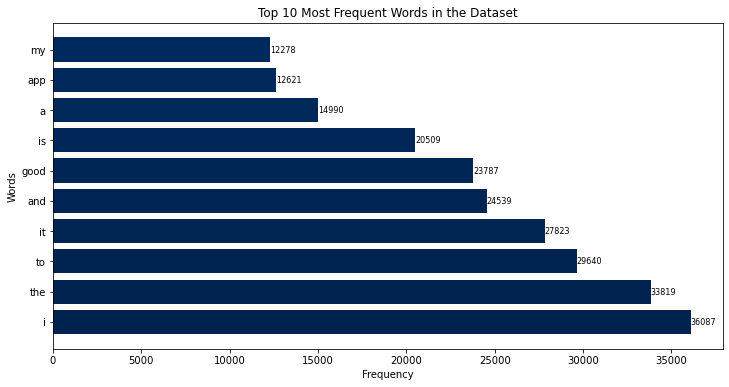

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter
import re

# Assuming df['content'] is the column you want to analyze
# Convert content column to strings
df['content'] = df['content'].astype(str)

# Concatenate the series into a single string
df_eda = ' '.join(df['content'])

# Remove punctuation and convert to lowercase
cleaned_text = re.sub(r'[^\w\s]', '', df_eda.lower())

# Tokenize the text into words
words = cleaned_text.split()

# Use Counter to count the frequency of each word
word_frequency = Counter(words)

# Get the top 10 and bottom 10 words
top_words = dict(sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)[:10])
bottom_words = dict(sorted(word_frequency.items(), key=lambda x: x[1])[:10])

cmap = cm.get_cmap('cividis')

# Plot the top 10 most frequent words with count annotations
plt.figure(figsize=(12, 6))
bars = plt.barh(list(top_words.keys()), list(top_words.values()), color=cmap(range(len(top_words))))

# Add count annotations beside each bar
for bar, count in zip(bars, top_words.values()):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             str(count), ha='left', va='center', fontsize=8, color='black')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words in the Dataset')

# # Plot the bottom 10 least frequent words
# plt.figure(figsize=(12, 6))
# plt.bar(bottom_words.keys(), bottom_words.values(), color='skyblue')
# plt.xlabel('Frequency')
# plt.ylabel('Words')
# plt.title('Bottom 10 Least Frequent Words in the Dataset')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


### Addressing Class Imbalance

We random sample 5500 rows of data for each class.

In [21]:
df = df.groupby('score').apply(lambda x: x.sample(n=5500, replace=True)).reset_index(drop=True) # you should have 5500 of each record at the end
df.value_counts()

df.score.value_counts()

1    5500
2    5500
3    5500
4    5500
5    5500
Name: score, dtype: int64

### Defining a Custom Dictionary of Contradictions and Stopwords

In [22]:
maxlen = 50  # We will cut reviews after 50 words
training_samples = 22000  # We will be training on 20000 samples (80% of data)
test_samples = 5500  # We will be testing on 5000 samples (20% of data)
max_words = 15000  # Only the top 15,000 words (by freq/times used) kept

contractions_dict = {
    "can't": "cannot",
    "cant": "cannot",
    "won't": "will not",
    "wont": "will not",
    "wouldn't": "would not",
    "wouldnt": "would not",
    "don't": "do not",
    "dont": "do not",
    "doesn't": "does not",
    "doesnt": "does not",
    "didn't": "did not",
    "didnt": "did not"
}

custom_stopwords = set(stopwords.words('english')) - {
    'not', 'no', 'nor', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", "can't", "cant",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
    'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
}


### Defning Functions

In [23]:
def excontractions(text, contractions_dict):
    contraction_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), 
                                     flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contractions_dict.get(match.lower(), contractions_dict.get(match))
        return expanded_contraction

    expanded_text = contraction_pattern.sub(expand_match, text)
    return expanded_text


### Preprocessing using Custom Functions and Lemmatization

In [24]:
def preprocess(txt):
    txt = str(txt) # conv to string so .lower works
    txt = txt.lower() #normalizing
    txt = re.sub(r'\d+', ' ', txt) # remove digits
    txt = re.sub(r"https?://\S+|www\.\S+", ' ', txt) # remove urls
    txt = excontractions(txt, contractions_dict)
    txt = re.sub(r'[^\w\s!]', ' ', txt)  # replace symbols with spaces
    txt = re.sub(r'[^\x00-\x7F]+', ' ', txt) # remove non-ASCII char
    symbols_to_replace = ["<", ">", "^", ",", ".", "?", "\"", "&", ":", ";", "'", "$", "/", "(", ")","@","#","%", "*", "_", "~"]
    for symbol in symbols_to_replace:
        txt = txt.replace(symbol, " ")
    txt = re.sub(r'\s+', ' ', txt).strip()
    tokens = txt.split()
    tokens = [t for t in tokens if t not in custom_stopwords]
    txt = ' '.join(tokens)
    lemmatizer = WordNetLemmatizer()
    txt = " ".join([lemmatizer.lemmatize(word) for word in txt.split()])
    return txt

preprocessed_list = [] 

for text in df['content']:
    print(text)
    preprocessed_text = preprocess(text)
    preprocessed_list.append(preprocessed_text)


They are cheater and use they power to destroy our Egyptian pharaoh history
This app is too hard to sign in
I am getting error like too many people are using your account, upgrade plan to view. But only I am watching and others are not I also logged out others but still showing same error And what I am trying to watch is already downloaded I feel like being cheated and tricked upgrade the plan Never buying Netflix again
The worst
Cant change subtitle color from white that sometimes when the an anime has white or light background you wont be able to read it, it is so frustrating. It might be because my phone was old. But heck why remove its compatibility when my phone is able to do it before. Device: Huawei P20 lite.
It isn't working in my Android
Greedy
Egypt for Egyptians and pharaohs were never black stop stealing Egypt's history and discover your history and your culture away Egypt's history We do not allow afrocentric to do what they want to do
Unhonest content
i need a free app wi

They cancel so many good shows.
So if people are paying for a family account they apparently can't use it if they live in separate households. Maybe stop canceling shows after one season and maybe people will pay for accounts. Screw you money hungry asshats you've lost me a customer.
Get bent
I want a free plan
Why did u remove one punch man season 1😵‍💫?
Bad
Go back to the old way.
not able to screenshare to my projector. only showing black screen with sound and subtitle
Lasted update don't even let me pay my Netflix and it keep lagging non stop
Good
It's just so bad and the historical movies they made are not even true ...and I even the people complain about it and they never listened
I live in a remote area with no access to wifi. I do however have a strong data signal and use my phones hotspot to watch netflix on my xbox. Netflix newest update makes it impossible to verify that my xbox is on my household plan. At this point even if they could fix it I would not renew my subscription

Its mid i can't find what i want to watch and i tought this app supposed to have everything
Not satisfied
Every time I tap on am account it just freezes and doesn't work at all! I want to swear! Make it better or I will sue you!
Netflix is against our culture and religion
you cant actually download it
You can watch
Its already been 3 weeks and i still can't used netflix always error pls fix this issue what a waste of money
White≠black get your character accurate
Its a very bad side if you take a sharing account u just waste your money you cant even watch something peachfully 😭
It is not allowed to interfere in the great civilization of Egypt
Ut to much lagging bro when Playing any thing
Dont get netflix if you travel or have more than one residence. A nightmare to manage this family plan. Will switch to prime soon
Bad
Bad
When i sign in they say uu are almost there
Good
Very bad
My account got hacked. The customer service support was of no help. Your service sucks.
Says I am unable to 

So fake
Cant even use my digital wallet to register
Worst experience
Some last update picture in picture isn't working. I tried other streaming apps and the picture in picture feature works fine. Checked my phone settings Netflix's permission for picture in picture is on. Any help would be great
Woke trash
We paid for it and it won't let us in
We want to see web series and movie in our kannada language💛❤️
This app keeps in kicking me out than it tells me incorrect password like I don't know what my password is I have to uninstall and reinstall alot of times
too heavy
Very bad fake hoax and spreading lies
This new "preview" feature is so annoying. When I try to find the episode I'm at, half my screen is blocked by a preview of a series that I already know and have watched! Same if I look for "more like this", it's blocked by a movie I already watched. Also I can't watch the credits after a movie, because I'm forced to watch another preview! After a moving experience where I want to enjo

Bad
The app is unusable at night because they try to hick the phone's brightness controls and it's way too bright to watch in a dark room.
Unable to watch anything
Very bad experience You should not have the app in your phone
So bad people didn't care about ethics
Very bad i uninstalled it because fake movies about egypt history like Cleopatra movie and other movies
Cannot update my payment neither by googlepay nor by debit card even after enabling international transactions and ecom... How to start payment I m from india
I thought i open a dark mode youtube
No Longer Good for People Who Travel for Work!!! You only get a limited number of codes for traveling. Both my husband and I travel extensively and never to the same location while the rest of the family is at home. The app is great, but Netflix's new policy for sharing accounts does not fit my family. Rates continue to go up and now I don't even have access to my own account!!! Good bye Netflix!
I want this app but now it's rated 

I can not sign up
wrong information and documentaries.. changing history for their favor
Have had this for a while and just recently the video has been bugged. Stuttering and unwatchable.
Black people have never been and will never be Egyptians. Egypt is ours as long as we are alive.
Sometimes display flick when subtitles is on
Very bad
Ever since this latest update I have been unable to use the app to play through my chromecast unless I am in the "kids" account area. Super annoying because I don't want to watch netflix on my small phone screen
How come there is no option for making video screen small coming? I am used to watching videos like the way they come up on youtube, i hate that moment u press play screen automatically goes wide screen in ur phone :$ which sucks, also wish there was an option to comment under videos, zeus app has it too how come you guys aint have it??
please fix the loading error
When i have downloaded movies on these app and start watching them without data t

Will not let me sign in on my tablet but will on my phone. When trying to sign in on the tablet just keeps telling me the password is incorrect but it is definitely not because it works fine on my other device I find this very frustrating
Against my beliefs and ethics
I cant even watch a single show....it is getting unexpected shutdown after every 5-10 mins...
Not good
very bad
Bad
You guys need to stop making cellphones a requirement to sign up for services. My grandma and a lot of older people she knows don't have cellphones. And working around that is a b!^ch
very badly screened racist films about religion
Dirty
Netflix, today I purchased your 1 month membership plan but I unable to watched movies and also facing problem in sign in your app please fix it as soon as possible🙏🙏
Too many LGBTQ support hate that
Unable to login or signup
My Netflix not working dunno why sudden stop supporting
Netflix is ​​slow to release new seasons. Unlike other app they already release a new season th

Fake
This new update of yours is bs
I love netflix but as of recently, it has been glitching like no other. To the point where you just either cant watch it or get too frustrated with it. I have heard this same thing happening to family and friends. It will let you start something then instantly stop 2 seconds in and go back to the home screen. I havent even been able to watch a full episode of anything in like a month, this is getting really ridiculous. This needs to be fixed or you will lose alot of people!
Not working on Galaxy A5?? Been fine mostly but in the last few days it doesn't work on my phone anymore. Reinstalled and still fails. Sort it out Netflix!!
It just do not want to approve my payment method no i can not watch my show.
very bad
Music is much louder than vocal in smart tv and mobile as well
Worse yet i have tried to take the payment but it always seems to pending
Bad
Nice
Bad
They need to update and get a bigger library.
Since the last 3 weeks this app is not working

Currently not loving the app since it keeps sending error messages when I try to open the app.
New ui is honestly terrible and more time consuming to browse through. 👎
Good but ,,keep telling me "there's problem opening this video please try again later"😥😥
Why the download content is not showing when unreacharged ... Except this some movie or contents become black out when takink screen shots
Its good but when I cast it from TV its blackscreen why is this?
It's beyond me why tech companies are always doing what right for their bottom line but not for the customers. Content is important, but features are also important. In a situation where more and more streaming platforms are available you should want to at least offer the standard. Please integrate with Google TV. Netflix is the only odd man out on this one. Why not make it easier for your customers to find your content or to resume watching one of your shows?
Sharing password is here so bye bye soon. no i dont share my password but 

Gud
Unable to create new account. Just keep showing wrong password
I really dislike the latest update of the netflix UI. I liked to see multiple shows laid out on the screen before with less scrolling, now it's just really hard to find anything without scrolling so much (even my own list!!?). I would be glad if you actually consider to change it back to the old layout cause it's really not doing anyone any good..
Not worth the price
No option to choose video quality
Netflix is greedy they go up in price every year it used to be 6.99$ per month now it's 10$ and that's the cheapest option, they don't care about struggling college kids considering they don't have a cheaper option specifically for students, they hardly ever have good content and I'd choose Hulu over Netflix any day however they have decent Netflix original anime
Please give the subtitle some stroke or shadow, i can't read anything if its just plain white.
It has some good shows and movies, the 1 star rating is for the simp

When i go watch it but it all black screen can't see only can hear
Worst app in the world
I think this Good
Ye not as good as it used to be.
Removed The Office
Keeps saying I cannot connect to the network
Having trouble every time i try to log in
First time it's so hard but it will soon be gracious and marvelous.🤯🤯🤯💯.
Great
Please don't go the amazon prime way. It is a waste app now with subscription and rent where ever you look. I hate the addition of mobile games.
In addition and iigood luck
Will cancel the membership due to their recent rules changes.
It is very stupid
you really need out better show on I'm tire of find good show just find out the voice are dubbed Iverson make for horrible viewing secondly I just read your telling you employees to basically quit because you're pushing a woke ideology have yall learned yet YOU GO WOKE YOU GO BROKE IM DEBATIN IN CANCELING MY SEVICE DUE YOU YOUR WOKE AGENDA
Nice one
Is nice but you can boost more series to never go to another app for s

When I open Netflix only audio coming not video
Some series cant be played, error or bug maybe
I only have this for a hand full of show's! Will be dropping as soon as the sharing ban is in affect!
The past couple of weeks Netflix does not resume where I left off. It goes back to the first episode or other random points in the show. Very annoying.
i am giving it 2 star because they just removed my favourite movie spider man far from home and they are gonna also remove spiderman no way home tommorrow
It is taking a hour to play
Did not allow me to sign in after upgrade
So .. if i subscribe then u guys will allow me to sign up 🙂
Interesting
Always no Arabic subtitle option, although there are half a billion arabic speaking human in the world 👎👎👎👎
Performance Bottom level service is also disaster Facing lot of bugs prblm Many more issues I m totally disappointed N number of times
Netflix is now the most foolish app almost every movie I want to watch is not on it not even black panther my f

B TT in h o b
The recent update does not remember position in a show or movie and starts all the way from the beginning again
I say two because you need to pay and sign the address and all those stuff and i love it but you need to pay and stuff.
The screen is going black when I try to watch a show
Seen most of everything and price has gotten to high for my taste thinking of cancelling it all together
The Picture in picture mode won't activate even after it has updated a couple of times. Could really use some advice
It always says device failure even my device is good
I'm disssapointed that the monthly fee has gone up and in the USA we don't have a good selection of famous movies to watch like the selection they had when I traveled to Central America.
Took away prison break
There is not enough content not enough anime series to watch what am I paying for then
Most of what makes a streaming subscription worth buying is the selection, which is good. But why the HECK does this app need to 

Why did Netflix recently switched the content from the future releases to Home and left the Home content in the SEARCH area????? This is completely and counterintuitive! Also, why the movie titles from banner are illegible with the outline removed along with the clear shape of the letters!??? Have you lost ALL your Designer and UX/UI professionals on the layoffs?? This app is getting worse every day!
Good
Got dry they are websites with better movies and more movies good effort though and also they try to stop other websites from giving us good movies and series .Netflix is slowy becoming the worst movie etcetera.
Pls they always debit my account monthly and then I am not watching the movies on this netflix ...pls tell me how do I watch the movies from my TV ...because I have tried it and it only play on my phone 📱 which I am not enjoying watching from there
Too bad experience
I'm okay with pass word sharing the only thing is can you guys please do like a watch parrty thing I'm trying t

Why is it always says error just like in the first 5 minute when I watched something and it is also glitching? I've re-install the app, rebooting my phone and I thought it was because my connection, however same thing keep happening. I wonder if this case also happen to other users? Please Netflix team, I hope you can fixed this issue. It is just a waste of our money on your subscription if things like this keep happening
Pl ask some responsible person to arrange for a call back
Cancel my account
Same thing everyday needs to be cycled alot more often with new movies
It does not work
Good
Its good
Since they removed free membership it has never been the same again.😩😩😩..time to switch to other sites 💯💯
Please Netflix fix the app layout I can't even find my continue watching list (Edit: why is it in the explore page and not the home page?)
It's a good app I understand why they made the update but it really can effect a bit of people for example I'm a college student and have a lot of bill

I hate the new update. If I try to watch a movie from my "continue watching" it restarts the movie along with other annoying things. Please fix this 😥
I liked it but when I log in it tells me you are now in the account but I am not in the account
I could see all the movie
New mobile setup is horrible and hard to navigate. Change it back.
Used to be great on the phone back in the day, but however it was reset up is not good at all. Constant buffering. Stuff is taking forever to play, & forever to load. Not cool. Stops way too often, & have to reload the show or movie all over again.
Fix the glitch! Unable to add to list or add set reminder for coming soon
Very bad this is not login 👎😵😓
I'm unable to see the subtitle when the movie is getting bright as the subtitle also bright. There is no setting to adjust the subs brightness or change color. This problem spoil my mood when watching netflix. I'm using mi 11 lite. Please fix this.
Worst update
Very Very slow I am so disappointed
Too much

Stupid
Good but no picture in picture for Android 12
It does not open even if I have wifi it remains on the big red letters NETFLIX Now I've installed it again it won't let me sign in
Slow
The app is good but the subtitles are very horrible. You absolutely cannot read them if the background is white or any light colors
Just got it back and I keep losing sound when I try to broadcast a show on my chrome cast, every other app works for sound but Netflix, I get sound on all other devices just not when broadcasting it, but that's how I watch shows so whats the point in paying for the premium if I can't even use it how I want to
I wish it can have an in picture option to watch
Still some great content, but they continue to invest less in creative diverse projects and more into mediocre white men punching down. And they raise rates, telling me that the execs don't plan to improve, just to milk their shrinking subscriber base as long as they can, and cash out with their golden parachutes afte

I am very happy with Netflix great app for entertainment
Again and again the same TV series movie comes out. Each time each one is actually better. Because TV series movies are already seen. For example, it would have been much better if the TV series movie of two or three years ago or the TV series movie of five years ago had been shown like this. In this way, it would be better to come forward one by one.need More content add.need all week update lots of movie, tv series etc.
Not that bad,patience is a virtue too
Netflix should provide details on cast insight screen through the watch that will really make things better.
Good
3 star coz they only have original shows and only put certain other movies n series in there ... would love to search and see a great range of movies ....
It's still good but most of the really great movies are gone now
This apps almost ruin my phone, it keeps making the volume up by it self and then pushing my phone on safe mode repeatedly. Uninstalling safe my 

Sure I love thus app but not all the movies I search are shown in it. I hope the company will do something
need more
I just love this app
3 stars because there is a glitch where it says sign in with google i press x and it goes away but it doesnt let you watch netflix i cant even open the app because of this please fix it
Very good app it would be 5 star if you added pokemon sun and moon back it was a lots of peoples fav show it was also so my fav so I would be very nice if you added the show back then I will give you a 5 star rating
You can watch a lot of movies and shows but I don't like when you add and take away some of my favorite movies the the Grinch realism my favorite Christmas movie
How can I disable Fast Laugh section?
Nice
There's some bugs like when you have something that you been watching it will not be in continue watching and sometimes it's glitchy but other then that there is plany of things to watch.!!!
He
Good
Why all movie is not showing???
It won't open correctly 

Everytime i go to watch something there is an issuse.
i love it
Not good..tere should allow without sign in also
The new update is not very usable, too much to scroll through and can't see recommendations
Put back family guy
There must be a volume adjuster on screen like there is a brightness adjuster.
I will promise you if you put 2x speed in playback speed, I will watch many of your shows.
It's still good but most of the really great movies are gone now
Its good but if your going to have a show on there... it would make A LOT more sense to have the first season and have it in order instead of starting it in the middle of the series.
Not bad
I do like netflix but I would like to see more stuff dub instead of subtitles I watch it on a phonevhard to read on a smaller screen
It was unexplainable
Bug screen rotate
Good
Great
Super
It would be good if you put South Park whole seasons cause i really wanna finish it.. I would appreciate if you do that 😁😁😁
Good
Mid
there is no problem with th

I m facing the problem of app screen showing slow
it is good
Good
Good quality movies bit unfortunately not all of them available Even Netflix originals
All I ask for is latest movies
Not very sure
The problem of netfilx is that for every country there is own movies and show and even if you want see it u cant use VPN, if at least hollowed movies and shows is the same on every country it will be the best platform, but it cant be the best
I have never use it so I can't describe it
It's good but the just the same look same shows different languages even though I live in a ENGLISH country
Waiting for 7th episode of see you in 19th life which was supposed to be updated on 8th July but still not updated even when half the day is gone
Was good for the longest time but now everything cost so much more.
Good when it opens up but sometimes it stops loading up when I open the app
This app is good but we want all seasons of demon slayer so I request you to bring all seasons of demon slayer
Its goo

I like this app and all the shows and movies but i give it three stars because they took off power rangers turbo
Most of series unable to watch ex: one piece . Love that show the only thing I renew my subscription . But unable to view sad to say but what a waste of time...
Not bad
Difficult
Good but some movies are locked
Netflix is okay mobile but then I watch tv they open screen or show video but not start video and not video up and down
Good
Not working with Android 13
Good but having Doctor Who back on here would be so amazing!
Good
Very nice
Not much to choose from
Good
all good shows are unavailable in south africa for some reason and the variety isnt much
Please add more control by category words, it will be much better like (violence or nudity or bad language) so we can close by words.
Good
We had a terrible rain storm and now I don't get any of my programs I am paying for how do I get them back help
Nice
Is need Money why
Nice
To much money and it keeps going up rarely have an

The picture-in-picture function not working for me please resolve the issue.
Filter option was great, but not available in the new version
the app is a good watching app however sometimes it will just randomly kick me out which is a personal problem however sometimes i cant go on the app in general which sucks because im paying for it
The app is great, but recently when I watch a movie, it error. I can hear the audio but the scene freeze
Sometimes this app just don't seem to work well with my phone. I hope this will he addressed. My phone is always updated but the app always crashes for some reason that I don't understand.
It has been amazing using this app but while I was watching a movie it told me to sign in and now I am signing in it is showing password incorrect
Join the 21st century and get pop up view.   I can't even use this app, because I can't do anything else on my phone at the same time.
Netflix is a solid streaming service, their latest UI update is pretty bad tho
I love t

Great
This is good app but premium
Not able to restart my membership with any of the payment methods
Best AAP for web series
App is great as always but recently they have changed the captions and its not a good viewing experience. The caption is now just flat and white. So when watching a scene that's very bright or white. You can't see the captions. Please bring back the shadows on the captions. It's especially important when watching a show that's in an another language.
NOT to bad just need more movies than expected
Netflix is sometimes laggy and they are bugs I think I can't even watch Netflix peacefully it's a little bit glitchy everytime I watch a movie or a show it's froze on its own for no reason watching Netflix on mobile is hard and you guys should keep track on other people likes and dislike that include the ones from the past when I dislike something it goes to the show you also may like section and the like and dislike is not working can you please do something about it
I 

I would give it a 5 BUT they got rid of it on chromebook i would stay up in the weekends and watch Netflix but now they wont show it on google play for chromebook users but jokes in them i still have it i just cant update it for when a new update drops
Thanks for letting us know we will email it to them and see if the other person in the evening but I woke me something to do with your life is so hard she is going to have missed your text
I had to rate it 3 star, because movies downloaded on It does not appear in my file manager. Please can any one teach me how to fix it.
Quite a hassle i couldn't use it on split screen :/
Nice
Super
Good thanks too many ads
Cool
It's a really nice app with reasonable subscription price but I'm having an issue with the fact that my phone is not being able to play in HD even tho it is Widevine L1 certified.
There are other shows i can't watch until i upgrade my netflix which is almost impossible
Netflix needs fix auto full screen fix and bug freezing scr

World best only one media company
Good move
I find this interesting and fun use
It is effective
Good
Good
This app is most popular
Can you add one more category , titled as ' Limited Series ' ?? That would be great 👍
Nice
Nice
Love it
The app is great but their trailers for shows/movies is deplorable. Please use actual trailers, not some inconsequential and random clips from the movie
Good
It's ok I enjoy it but I am upset that you have taken out dragon ball z and bleach
Good
This app helps but is also boring that is why I am giving it 4,stars
Great
Its pretty good but they don't have my favourite movie s
Most of the time it's fairly good
It good
Good
Not sure yet
Good
Good app could have a few old old classics though but all good
Ever since I have Been using this app I really love it I get watch latest update movies and series But fot the payment methods it's sucks
No experience
Problem is many shows not in hindi dubbing we want hindi
Very useful for entertaining
Dose not have x the b

Good
It is an amazing app and watching experence. The only thing I have a problem with is the limited choices for what you can watch.
Good
I would give this a 5 star but dont remove movies!? Just bring back escape room tournamet of champions theatrical cut in the philippines
Nice
its got a lot of anime but pls add more movies
Not bad
Already have Netflix with sky
Honestly great, though I don't like how some movies just expire out of thin air
Very good as my first time
Bring Haikyuu the anime back on Netflix, it was a really good show and popular. I don't understand why it got removed but hopefully you people will bring it back??😭
Show all should be in English if its English speaking country
I liked it a pretty good bit was a little sharp though of the
This app is all good and all but I'm a little angry that they removed corpse Bride
It's cool but you can still do more
Lately while watching anything the screen freezes but the voice keeps in going. I have to jump forward a bit for the vi

Nice
great
Love
Best Ever
Its a little to expensive for the movies that are on here
Good
Would like see the both supported and max available audio and video formats for any content, even on mobile. That way I can choose to watch on mobile or my home theatre. :-)
Very good
Too good
Awesome
Excellent
Nice application
I made payment but can't see any series
I love the movies but can we add the movie "encanto" on it ?☺️
Great
Very good
I love it but not all i want is here especially the anime
I think this app is great it gives so many awesome things to watch and it's not very expensive the only reason I give it a 4 star is because there are a lot of shows that miss seasons witch make me really sad for example attack on Titan is only 1 season not the full 4 also demon Slayer also only has 1 season not the others but other then that it's a good app.
Is good and nice app u have to download it and see same video's
A M A Z I N G
Nice
They need to add new movies a little quicker tbh but overall 

Awesome
I LOVE ANIME BUT WE NEED MORE!!!
Its amazing but one thingy is that the movie i want to watch is not there Now
I think netflix it app even if it takes time but anyway it takes much for people to watch their role models even if eectricity is gone you can watch your phone and leptops
This is a brilliant app,and I would be lost without it.There is a great range of movies,shows and documentaries from all different genres.I rarely have any problems on the app but the one thing I would say is every so often they clear everything off but the new movies which is very annoying.The new movies coming in are Spanish for some reason?But all in all a very good app and I would recommend
Good
Love this app the quality of the movies are so good and so many choices!!
good apart from the fact it deletes the best shows to make room for really bad ones
I got no problem wit flix
netflix is a great app byt im not sure if there was a recebt update because i currently cant open netflix. it would just s

But is so good
I do love it tho but when I want to save my videos into the SD card it's doesn't want me to save it please fix it so that's why I give it a 4 star
Not bad
Fa
It is fine
Its a nice app but you guys need to update us with new movies
Thus is an amazing app,but not every movie and series are on this app that's all
Easy to use and navigate.
It's Good But There Is No Movies Like Spider Man No Way Home And No Time To Die So Please Add Them
Very cool
I like the it
Nice
Good
PRETTY GOOD
I dont know
kept kicking me out but overall good experience
Favorite
Very joyful although quite costly
Good
Haven't checked well yet but after taking prime it will be good
I am a newcomer to this service
It is all around good at times takes longer to connect but not sure if it is due to my service or the app I am guessing both ..
Good
Good
Good
Nothing but the best
Something i love but hate about netflix is that there is alot of cool anime to watch but ether its missing the second part or the firs

Good
Nice
Good
Awesome
Super
Netflix is a great app, the reason why am not giving it a five star is because of the bugs and the annoying white on white subtitle instead of the former white on black. Please do bring back the white on black subtitle. Thank you
Best thing for timepass and 1 i dint like is that it does not have some movies and animes
Alright
Great but for some reason I cannot cast on my tv
Good
Good
The only reason to get it is one piece, good movement netflix
But we lost our human made pinkymilinky die😭 he was the resin wy childhood was happy but my childhood died so if you can make it so that he isind died😭 thank,s😭
Good
Looking for fun, somewhere to get rid of your stress you found it,,the app is so great with million of movies brought together
Good
Bad
It is cool
Perfect but not complete with all movies
Good
It is amazing end of
Its good but sometimes the subtitles are wrong and i get the 4.5 error
Is the best
The app is so amazing and good I can watch all the anime or

Nice
Vice City Wale like kaee✨✨👍👍
It needs more anime but it is good
Not opening
It is the very best app anyone can use for watching tv. A good price, I just wish there was more anime (like demon slayer or mha)
I love the movie selection and I never get bored.
It is ok but it sometimes it dose not work
Sometimes goes in slow motion I have to get out and go back in
Grounds for a new kinda healthy optimism eg watch how you take a drink ie sensibly ! While watching films or whatever
it could have newer content more regularly
It's a really great app for entertainment but I've got an issue with the app. Sometimes I try downloading a series and am told that the series is downloaded in way too many devices, yet it's the first time downloading it. What can I do about that?
We Need 2X Playback Speed Option
Hmm why you add black background in sub? It is really uncomfortable for me tho, please return it to normal without those black background.
Love the app but I think it needs to be updated and 

Happy
The best srevices for me
Magnificent
Slow to load
Excellent
Nice
Unable to login
Fantastic
If you need a good film or music then join Netflix.
Great
I love net flix it show,s great action and horror movies.
Awesome
Delete
Best
Good
Super
Super bowl
Literally perfect
just love it
Puh I just had to resign into Netflix as the system booted me out. Start from scratch again.
Good job
Fantastic
very wow
Very good but all the latest films are not on it.
Awesome
Dope
I love it It's very awesome And it's interesting
Hi dear Please kindly put the option in app for language change movies in Hindi and the others because many people who lived in out of there country to see movies and Web series and etc in his own language
Goods quality
Its great i watch alot of Netflix but i wish they had all of Victorious
Good
Love it
Very good
Excellent
Polar add more free content with ads Thank you
Absolutely Good
I mean its Netflix what more is there to say
Gud
Excellent
Good
Good work
Its great boss love

Great
Good
Let me c how this works
Best
Why can't the application install on my phone after downloading?
AWESOME
Very good it just seems to get better and better
Supper life making this makes me smile every time I use it
Where in the world is my nextflixaccount
So good movie
Always something to watch very entertaining.
Berry good
Good so far
Amazing
Very good
Help me
Good
Good better best
Amazing
Good
Happy
Everybody have a good night
Nice
You can watch almost everything you'd like and I don't see any issues
I need more new movies
Nice
This app is very exiting and I love it
Its great
Excellent
I love watching new stuff
Good
Good
Good and nice experience with this application for me.
Nice
I like watching Netflix movie
It is good and faster
Good
Good
Fantastic
Write Introduce
I love Netflix, but please add season two of Heavens Official Blessing and more BL anime♡
please all anime get Hindi
Awesome
I use it all the time
Exceptionally the best movie app💃💃
Very good but not bringing out no

So reliable
This app is very good it help such movie at my free time
One of the best movie apps ever I recommend it to anyone thank you Netflix for the great shows and movies
Exquisite
Works
its a great app! just when ever i try and get clips on it to record and such, it just goes black, its super annoying.
Very good
It was like wow great app keep it up
I hope I will find it interesting becos am just joining
Super
Too good can even watch anime no need for anime tube now😁
I love it so much is my favourite movies station
It is awesome
Too good
Does what it meant to do
Good
I look exploring new and the old goodies
The best
Best entertainment
Good
super nice
Short and sweet I just love Netflix
Very good
V good
super cool
Good
Great great great
So much help
Good
Great
Nice
Excellent
Wow
i love it
Good preview
Good
So far so good
Excellent
The best
I love Netflix because it got my favourite film GREEN EGGS AND HAM I LOVE IT AND THERE IS MORE TO.
Perfect
Nice good
Good
Great
It have all movie

I think the app is great
Good
good
Entertaining
Good
It as good movie and show and I give it a five
Very good
Good
Wow
Amazing
Very good
Good
Nice
Not a single complaint other I wish some content could left longer
Good
very good
Works well
Make me relax and stay on alltime
Excellent
I couldn't live life without it
Looking forward to seeing you soon on TV
Good
So nice to have more kDramas series live it...
It is good entertainment
Great app I have ever have
Great ALL Around Selection
You know where am at....home
Great
lower the rate of subscription
The Very Best
best
Nice movie
I like Netflix and all but the price for it is outrageous
Straight forward thank you
Super
I enjoy this app so much
I LOVE THAT SO MUCH!!!!!!!!!
The best app to watching a movie
Excellent
Very good But Don't login mode is on so The is more good
Good
Good
I love it I am basically on it all the time .
Great
Good
This is the Best app ever I Don't have no problem the way it connects quick is Better thin any other app

The app is so wow to be access In anytime of interest
i love it and i love how many option there are
Seamless and easy to use
Sorry last comment was my brother this app is amazing
very quick and fast
Nice
Good
Enjoy
Good
Good
Excellent
Nice
Best for watching Series
All good
Nice
the best
Good
Good luck
So cool and chill
I like all of us are dead movie and netflix too
I love this app No long cap
Very good
Easy to watch my favourite movie
Good
Its too good
Free video
Epic
Nice
good
Great couldn't live without IT
Very good
Good
I love it
Love it
Good
Great. Watch all the time
afternew update when i play movies after some time that movie close automatically again and again
Work great
Good
I new to this app. I know the show is an older show but I need more seasons of chicago fire and chicago med. 😞
Best
Good nice application
Awesome
Good
Is very good and interesting
Awesome
Nice
Great
The best experience ever 👍👍🤩😍
Good for the family
Very nice
I love this
Its not working
Great source to wat

In [25]:
preprocessed_list

['cheater use power destroy egyptian pharaoh history',
 'app hard sign',
 'getting error like many people using account upgrade plan view watching others not also logged others still showing error trying watch already downloaded feel like cheated tricked upgrade plan never buying netflix',
 'worst',
 'cannot change subtitle color white sometimes anime white light background not able read frustrating might phone old heck remove compatibility phone able device huawei p lite',
 'isn working android',
 'greedy',
 'egypt egyptian pharaoh never black stop stealing egypt history discover history culture away egypt history not allow afrocentric want',
 'unhonest content',
 'need free app without subscription',
 'new version worst netflix last good best cannot find new movie series getting difficulty find old movie new movie short date format please provide old version others wise cancel membership',
 'super',
 'agenda every thing show',
 'netflix account got hacked',
 'political correctness ru

In [26]:
# tokenizer here (maps words to numbers)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(preprocessed_list)
tk = tokenizer.texts_to_sequences(preprocessed_list)

print('Found %s unique tokens.' % len(tokenizer.word_index))

# pad sequence
data = pad_sequences(tk, maxlen=maxlen) # 0s are appended in front if lack, otherwise cut off


print('Shape of data tensor:', data.shape)

labels = df['score'].values
print('Shape of label tensor:', labels.shape)


print(preprocessed_list)
print(labels)

Found 7954 unique tokens.
Shape of data tensor: (27500, 50)
Shape of label tensor: (27500,)
['cheater use power destroy egyptian pharaoh history', 'app hard sign', 'getting error like many people using account upgrade plan view watching others not also logged others still showing error trying watch already downloaded feel like cheated tricked upgrade plan never buying netflix', 'worst', 'cannot change subtitle color white sometimes anime white light background not able read frustrating might phone old heck remove compatibility phone able device huawei p lite', 'isn working android', 'greedy', 'egypt egyptian pharaoh never black stop stealing egypt history discover history culture away egypt history not allow afrocentric want', 'unhonest content', 'need free app without subscription', 'new version worst netflix last good best cannot find new movie series getting difficulty find old movie new movie short date format please provide old version others wise cancel membership', 'super', 'age

In [27]:
print(data)

[[   0    0    0 ...  288 2399  116]
 [   0    0    0 ...    3  139  105]
 [   0    0    0 ...  117 1610    5]
 ...
 [   0    0    0 ...    0   13   17]
 [   0    0    0 ...    0    0  180]
 [   0    0    0 ...    0  253 3067]]


### Showing Word Index based on Tokeniser's Input

In [28]:
word_index = tokenizer.word_index
word_index

{'not': 1,
 'good': 2,
 'app': 3,
 'movie': 4,
 'netflix': 5,
 'watch': 6,
 'show': 7,
 'like': 8,
 'please': 9,
 'cannot': 10,
 'time': 11,
 'love': 12,
 'nice': 13,
 'new': 14,
 'no': 15,
 'great': 16,
 'one': 17,
 'update': 18,
 'get': 19,
 'want': 20,
 'bad': 21,
 'watching': 22,
 'phone': 23,
 'need': 24,
 'series': 25,
 'really': 26,
 'even': 27,
 'best': 28,
 'use': 29,
 'screen': 30,
 'fix': 31,
 'account': 32,
 'back': 33,
 'would': 34,
 'see': 35,
 'video': 36,
 'problem': 37,
 'content': 38,
 'u': 39,
 'thing': 40,
 'keep': 41,
 'work': 42,
 'make': 43,
 'much': 44,
 'pay': 45,
 'go': 46,
 'add': 47,
 'option': 48,
 'still': 49,
 'service': 50,
 'working': 51,
 'open': 52,
 'tv': 53,
 'every': 54,
 'money': 55,
 'issue': 56,
 'subtitle': 57,
 'subscription': 58,
 'people': 59,
 'something': 60,
 'find': 61,
 'play': 62,
 'change': 63,
 'give': 64,
 'many': 65,
 'also': 66,
 'day': 67,
 'better': 68,
 'way': 69,
 'know': 70,
 'season': 71,
 'black': 72,
 'star': 73,
 'lot': 7

### Shuffling and Labelling

In [29]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

### Train-test Split

In [30]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples: training_samples + test_samples]
y_test = labels[training_samples: training_samples + test_samples]

In [31]:
x_train

array([[   0,    0,    0, ...,    0,    0,   68],
       [   0,    0,    0, ...,   25,   20,    6],
       [   0,    0,    0, ...,    0,    2,    3],
       ...,
       [   0,    0,    0, ...,    0,    0,   12],
       [   0,    0,    0, ...,    8,    5,   44],
       [   0,    0,    0, ..., 1689, 1428,    6]])

In [32]:
x_test

array([[   0,    0,    0, ...,  460,   46,  131],
       [   0,    0,    0, ...,    0,  104,   76],
       [   0,    0,    0, ...,   92,  274,  123],
       ...,
       [   0,    0,    0, ...,  691, 5057, 5058],
       [   0,    0,    0, ...,  831,   95,  296],
       [   0,    0,    0, ...,  324, 2896, 3077]])

In [33]:
y_train

array([3, 3, 5, ..., 5, 5, 5], dtype=int64)

In [34]:
y_test

array([2, 5, 4, ..., 4, 1, 4], dtype=int64)

# Use `x_train`, `x_test`, `y_train` and `y_test` to continue on

In [35]:
x_train.shape

(22000, 50)

In [36]:
import numpy as np

unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)

# Check if there are any values outside the range [0, 5)
invalid_labels = [label for label in unique_labels if label < 0 or label >= 5]
print("Invalid labels:", invalid_labels)


Unique labels in y_train: [1 2 3 4 5]
Invalid labels: [5]


In [37]:
y_train = y_train - 1

In [38]:
y_test = y_test - 1

In [39]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the reserved 0 index
print("Vocabulary size:", vocab_size)

Vocabulary size: 7955


In [40]:
# Ensure that indices are within the valid range
x_train = np.clip(x_train, 0, vocab_size - 1)


In [41]:
from tensorflow.keras.layers import SimpleRNN

In [42]:
training_samples = 22000  # We will be training on 20000 samples (80% of data)
test_samples = 5500  # We will be testing on 5000 samples (20% of data)
max_words = 15000  # Only the top 15,000 words (by freq/times used) kept

In [43]:
vocab_size = len(word_index)
print("Vocabulary Size:", vocab_size)

Vocabulary Size: 7954


### After one hot encoding on the label class

In [44]:
from tensorflow.keras.utils import to_categorical
num_classes = 5
y_train = to_categorical(y_train, num_classes=num_classes)

In [45]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [46]:
y_test = to_categorical(y_test, num_classes=num_classes)
y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [47]:
def unpackPerformance(output, epoch):
    lines = output.split('\n')
    epochs = []
    loss_values = []
    acc = []
    val_loss_values = []
    val_acc = []

    for line in lines:
        words = line.split()
        if "loss" in line:
            loss_values.append(float(words[7]))
            acc.append(float(words[10]))
            val_loss_values.append(float(words[13]))
            val_acc.append(float(words[16]))

    epochs = [i for i in range(1, epoch+1)]
    
    return epochs, loss_values, acc, val_loss_values, val_acc

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotPerformance(epochs, loss_values, acc, val_loss_values, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

### Creating a Baseline Model

The workflow is to:
- Tune the layer for embedding units
- Number of hidden layers
- Learning Rates
- Batch Sizes
- Number of nodes in each hidden layer
- Dropout layers
- Activation Functions (optional)

In [82]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import tensorflow as tf
import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [109]:
import gensim
import pandas as pd
import smart_open
import random
from smart_open import smart_open

In [110]:
def read_corpus(documents):
    for i, plot in enumerate(documents):
        yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(plot, max_len=30), [i])

In [111]:
train_corpus = list(read_corpus(df.content))

In [112]:
train_corpus[:2]

[TaggedDocument(words=['they', 'are', 'cheater', 'and', 'use', 'they', 'power', 'to', 'destroy', 'our', 'egyptian', 'pharaoh', 'history'], tags=[0]),
 TaggedDocument(words=['this', 'app', 'is', 'too', 'hard', 'to', 'sign', 'in'], tags=[1])]

In [113]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=55)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)


KeyboardInterrupt: 

In [114]:
import numpy as np
from gensim.models.doc2vec import Doc2Vec

# Save the model to a file
model.save("doc2vec_model")

# Load the model from the file
model = Doc2Vec.load("doc2vec_model")

# Get word vectors and their corresponding words
word_vectors = np.array([model.wv[word] for word in model.wv.key_to_index])
words = list(model.wv.index_to_key)

# Save word vectors
np.savetxt('word_vectors.tsv', word_vectors, delimiter='\t')

# Save metadata (words) with UTF-8 encoding
with open('metadata.tsv', 'w', encoding='utf-8') as f:
    for word in words:
        f.write(word + '\n')


In [115]:
import tensorflow as tf

# Load the word vectors
word_vectors = np.loadtxt('word_vectors.tsv', delimiter='\t')

# Create a TensorFlow summary writer
with tf.summary.create_file_writer('C:\\Users\\user\\Documents\\DL\\Deep-Learning-for-Sentimental-Analysis-for-Google-Play').as_default():
    # Log the embeddings
    tf.summary.write('word_embeddings', word_vectors, step=0)


In [116]:
tf.compat.v1.disable_eager_execution()
sess = tf.compat.v1.InteractiveSession()
with tf.device('/cpu:0'):
    embedding = tf.Variable(word_vectors, trainable=False, name='embedding')
    
sess.run(tf.compat.v1.global_variables_initializer())

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [117]:
saver = tf.compat.v1.train.Saver()

In [118]:
from tensorboard.plugins import projector
saver = tf.compat.v1.train.Saver()
writer = tf.compat.v1.summary.FileWriter('projections', sess.graph)
config = projector.ProjectorConfig()
embed= config.embeddings.add()
embed.tensor_name = 'embedding'
embed.metadata_path = 'metadata.tsv'
projector.visualize_embeddings (writer, config)
saver.save(sess, 'projections/model.ckpt', global_step=7955)


'projections/model.ckpt-7955'

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Model

# Load your model
model = Model()

# Load the word vectors
word_vectors = np.loadtxt('word_vectors.tsv', delimiter='\t')

# Create a TensorFlow summary writer
with tf.summary.create_file_writer('projections').as_default():
    # Log the embeddings
    tf.summary.write('word_embeddings', word_vectors, step=0)

# Initialize a dummy session to make sure the writer writes the graph to disk.
# This step is necessary in TensorFlow 2.x.
tf.summary.flush()

<tf.Operation 'NoOp_2' type=NoOp>

In [120]:
import os
import numpy as np
import tensorflow as tf
from tensorboard.plugins import projector

# Load the word vectors
word_vectors = np.loadtxt('word_vectors.tsv', delimiter='\t')

# Load metadata (words)
with open('metadata.tsv', 'r', encoding='utf-8') as f:
    words = [line.strip() for line in f]

# Create a TensorFlow summary writer
log_dir = 'projections'
summary_writer = tf.summary.create_file_writer(log_dir)

with summary_writer.as_default():
    # Create the embedding projector
    embedding = tf.Variable(word_vectors, name='word_embeddings')
    projector_config = projector.ProjectorConfig()
    embedding_config = projector_config.embeddings.add()
    embedding_config.tensor_name = embedding.name
    embedding_config.metadata_path = 'metadata.tsv'
    projector.visualize_embeddings(log_dir, projector_config)

# Flush the writer to make sure the events are written to disk
summary_writer.flush()


<tf.Operation 'FlushSummaryWriter_13' type=FlushSummaryWriter>

In [121]:
tensorboard --logdir=projections --port=30148

Reusing TensorBoard on port 30148 (pid 2620), started 0:14:51 ago. (Use '!kill 2620' to kill it.)

### Tuning Embedding Layer

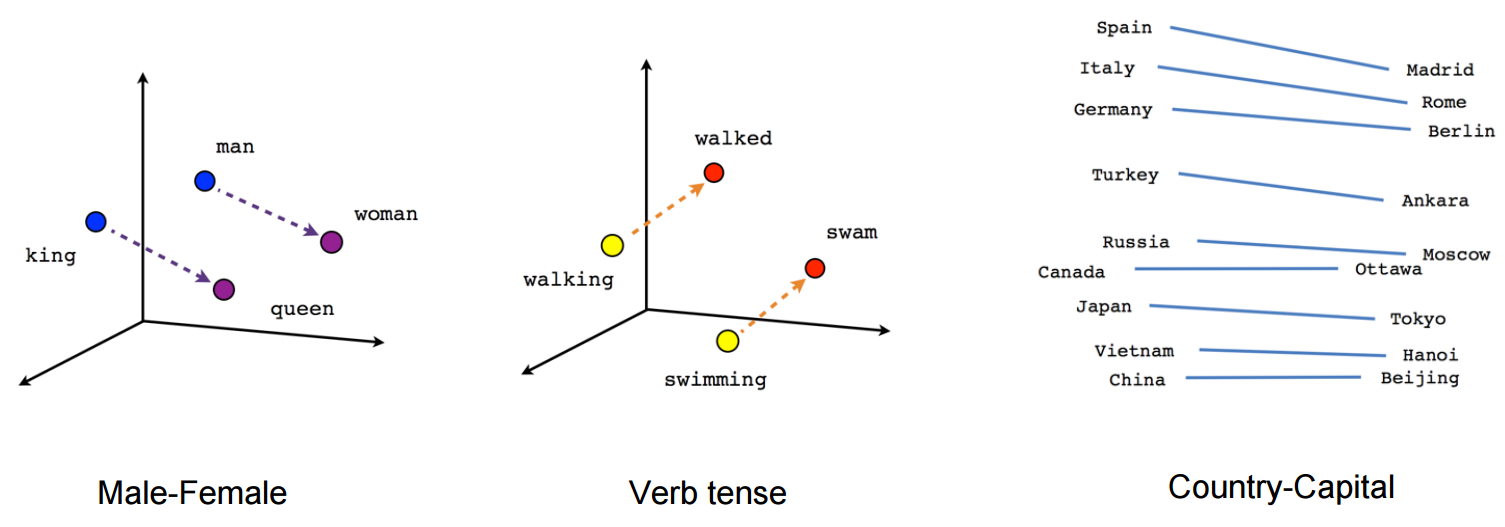


According to Baeldung, larget datasets can support higher-dimensional embeddings, as they provide more training data for model. The general rule of thumb is:

- a dataset with less than 100,000 sentences, benefit from a lower dimensional embedding. This can be 50 to 100 dimensions. 
- a dataset with larger than that, benefit from a higher-dimensional embedding (200-300 dimensions). 

Hence, we decide to choose only 50 to 100 dimensions, since it is for smaller dataset with only about 30,000 rows, or sentences.

The best approach is to experiment, using different dimensionalities, and evaluating the performance of the model, on validation set.

We also start off with a simple RNN model with 32 nodes on one layer

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

def create_model_v1(embedding_size):
    model = Sequential()
    model.add(Embedding(vocab_size+1, embedding_size, input_length=x_train.shape[1]))
    model.add(SimpleRNN(32))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    
    return model

We try an embedding with 60, 70, 80, 90 and 100 dimensions. Then, we compare this result to a pretrained word embedding.

In [53]:
modelEmbedding60 = create_model_v1(60)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 60)            472740    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2976      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 475881 (1.82 MB)
Trainable params: 475881 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
modelEmbedding70 = create_model_v1(70)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 70)            551530    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3296      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 554991 (2.12 MB)
Trainable params: 554991 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
modelEmbedding80 = create_model_v1(80)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 80)            630320    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                3616      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 634101 (2.42 MB)
Trainable params: 634101 (2.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
modelEmbedding90 = create_model_v1(90)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 90)            709110    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                3936      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 713211 (2.72 MB)
Trainable params: 713211 (2.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
modelEmbedding100 = create_model_v1(100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           787900    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 792321 (3.02 MB)
Trainable params: 792321 (3.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
historyEmbedding60 = modelEmbedding60.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=10,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/10


550/550 [==============================] - 7s 9ms/step - loss: 1.4143 - accuracy: 0.3847 - val_loss: 1.2819 - val_accuracy: 0.4727
Epoch 2/10
550/550 [==============================] - 5s 9ms/step - loss: 1.0817 - accuracy: 0.5772 - val_loss: 1.2412 - val_accuracy: 0.5000
Epoch 3/10
550/550 [==============================] - 5s 8ms/step - loss: 0.8288 - accuracy: 0.6820 - val_loss: 1.2868 - val_accuracy: 0.5043
Epoch 4/10
550/550 [==============================] - 5s 9ms/step - loss: 0.6958 - accuracy: 0.7290 - val_loss: 1.3759 - val_accuracy: 0.5175
Epoch 5/10
550/550 [==============================] - 6s 10ms/step - loss: 0.6266 - accuracy: 0.7529 - val_loss: 1.4740 - val_accuracy: 0.5064
Epoch 6/10
550/550 [==============================] - 6s 10ms/step - loss: 0.5866 - accuracy: 0.7649 - val_loss: 1.5387 - val_accuracy: 0.5116
Epoch 7/10
550/550 [==============================] - 6s 10ms/step - loss: 0.5651 - accuracy: 0.7698 - val_loss: 1.6049 - val_accuracy: 0.5116
E

In [59]:
historyEmbedding70 = modelEmbedding70.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=10,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/10
550/550 [==============================] - 7s 11ms/step - loss: 1.3893 - accuracy: 0.3971 - val_loss: 1.2990 - val_accuracy: 0.4643
Epoch 2/10
550/550 [==============================] - 6s 11ms/step - loss: 1.0633 - accuracy: 0.5822 - val_loss: 1.2326 - val_accuracy: 0.5098
Epoch 3/10
550/550 [==============================] - 6s 11ms/step - loss: 0.8143 - accuracy: 0.6864 - val_loss: 1.2724 - val_accuracy: 0.5207
Epoch 4/10
550/550 [==============================] - 6s 12ms/step - loss: 0.6883 - accuracy: 0.7311 - val_loss: 1.3844 - val_accuracy: 0.5195
Epoch 5/10
550/550 [==============================] - 6s 11ms/step - loss: 0.6261 - accuracy: 0.7551 - val_loss: 1.4261 - val_accuracy: 0.5252
Epoch 6/10
550/550 [==============================] - 6s 11ms/step - loss: 0.5807 - accuracy: 0.7705 - val_loss: 1.5204 - val_accuracy: 0.5182
Epoch 7/10
550/550 [==============================] - 6s 11ms/step - loss: 0.5632 - accuracy: 0.7743 - val_loss: 1.5733 - val_accuracy: 0.5261

In [60]:
historyEmbedding80 = modelEmbedding80.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=10,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/10
550/550 [==============================] - 7s 11ms/step - loss: 1.3888 - accuracy: 0.3992 - val_loss: 1.2802 - val_accuracy: 0.4614
Epoch 2/10
550/550 [==============================] - 6s 11ms/step - loss: 1.0640 - accuracy: 0.5868 - val_loss: 1.2164 - val_accuracy: 0.5095
Epoch 3/10
550/550 [==============================] - 6s 11ms/step - loss: 0.8236 - accuracy: 0.6831 - val_loss: 1.2695 - val_accuracy: 0.5186
Epoch 4/10
550/550 [==============================] - 6s 11ms/step - loss: 0.6877 - accuracy: 0.7323 - val_loss: 1.3604 - val_accuracy: 0.5168
Epoch 5/10
550/550 [==============================] - 6s 11ms/step - loss: 0.6230 - accuracy: 0.7545 - val_loss: 1.4549 - val_accuracy: 0.5098
Epoch 6/10
550/550 [==============================] - 6s 11ms/step - loss: 0.5997 - accuracy: 0.7591 - val_loss: 1.4915 - val_accuracy: 0.5248
Epoch 7/10
550/550 [==============================] - 6s 11ms/step - loss: 0.5698 - accuracy: 0.7701 - val_loss: 1.5616 - val_accuracy: 0.5034

In [61]:
historyEmbedding90 = modelEmbedding90.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=10,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/10
550/550 [==============================] - 8s 12ms/step - loss: 1.3904 - accuracy: 0.3961 - val_loss: 1.2892 - val_accuracy: 0.4570
Epoch 2/10
550/550 [==============================] - 6s 11ms/step - loss: 1.0557 - accuracy: 0.5870 - val_loss: 1.2133 - val_accuracy: 0.5100
Epoch 3/10
550/550 [==============================] - 6s 12ms/step - loss: 0.8156 - accuracy: 0.6883 - val_loss: 1.2607 - val_accuracy: 0.5091
Epoch 4/10
550/550 [==============================] - 6s 12ms/step - loss: 0.6945 - accuracy: 0.7324 - val_loss: 1.3812 - val_accuracy: 0.5105
Epoch 5/10
550/550 [==============================] - 6s 12ms/step - loss: 0.6266 - accuracy: 0.7547 - val_loss: 1.4377 - val_accuracy: 0.5214
Epoch 6/10
550/550 [==============================] - 7s 12ms/step - loss: 0.5937 - accuracy: 0.7628 - val_loss: 1.4831 - val_accuracy: 0.5286
Epoch 7/10
550/550 [==============================] - 6s 12ms/step - loss: 0.5669 - accuracy: 0.7699 - val_loss: 1.5650 - val_accuracy: 0.5252

In [62]:
historyEmbedding100 = modelEmbedding100.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=10,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/10
550/550 [==============================] - 8s 12ms/step - loss: 1.3873 - accuracy: 0.4027 - val_loss: 1.2697 - val_accuracy: 0.4691
Epoch 2/10
550/550 [==============================] - 7s 12ms/step - loss: 1.0422 - accuracy: 0.5924 - val_loss: 1.2249 - val_accuracy: 0.5011
Epoch 3/10
550/550 [==============================] - 7s 12ms/step - loss: 0.8041 - accuracy: 0.6908 - val_loss: 1.2796 - val_accuracy: 0.5202
Epoch 4/10
550/550 [==============================] - 6s 12ms/step - loss: 0.6809 - accuracy: 0.7358 - val_loss: 1.3905 - val_accuracy: 0.5093
Epoch 5/10
550/550 [==============================] - 7s 12ms/step - loss: 0.6237 - accuracy: 0.7532 - val_loss: 1.4596 - val_accuracy: 0.5241
Epoch 6/10
550/550 [==============================] - 7s 12ms/step - loss: 0.5831 - accuracy: 0.7691 - val_loss: 1.5464 - val_accuracy: 0.5180
Epoch 7/10
550/550 [==============================] - 6s 12ms/step - loss: 0.5610 - accuracy: 0.7739 - val_loss: 1.6108 - val_accuracy: 0.5191

In [88]:
import matplotlib.pyplot as plt

def plotFromHistories(histories, title, hyperparam_name, hyperparam_values):
    plt.figure(figsize=(16, 8))
    
    # Plotting accuracy
    plt.subplot(2, 2, 1)
    for i, history in enumerate(histories):
        acc = history.history['accuracy']
        plt.plot(acc, 'o-', label=f'Training Accuracy ({hyperparam_name} = {hyperparam_values[i]})')

    plt.title(f'Training Accuracy - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting validation accuracy
    plt.subplot(2, 2, 2)
    for i, history in enumerate(histories):
        val_acc = history.history['val_accuracy']
        plt.plot(val_acc, 'o-', label=f'Validation Accuracy ({hyperparam_name} = {hyperparam_values[i]})')

    plt.title(f'Validation Accuracy - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(2, 2, 3)
    for i, history in enumerate(histories):
        loss = history.history['loss']
        plt.plot(loss, 'o-', label=f'Training Loss ({hyperparam_name} = {hyperparam_values[i]})')

    plt.title(f'Training Loss - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting validation loss
    plt.subplot(2, 2, 4)
    for i, history in enumerate(histories):
        val_loss = history.history['val_loss']
        plt.plot(val_loss, 'o-', label=f'Validation Loss ({hyperparam_name} = {hyperparam_values[i]})')

    plt.title(f'Validation Loss - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()


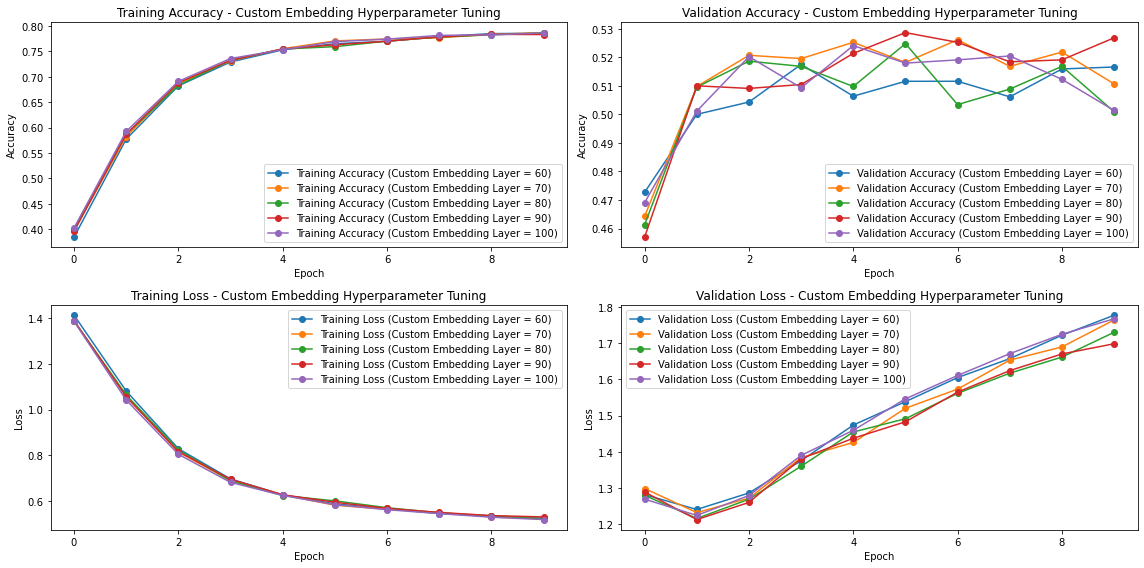

In [89]:
histories = [historyEmbedding60, historyEmbedding70, historyEmbedding80, historyEmbedding90, historyEmbedding100]
batch_sizes = [60, 70, 80, 90, 100]
title = 'Custom Embedding Hyperparameter Tuning'
hyperparam_name = 'Custom Embedding Layer'
hyperparam_values = [60, 70, 80, 90, 100]

plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

Now, we try using the pretrained word embedding, GloVe:

### Using GloVe Word Embeddings

The cell code below is run on local jupyter notebook.

In [158]:
import os
import numpy as np

glove_dir = 'glove.6B'

embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 15233 word vectors.


### Creating Embedding Matrix used as Weights of Embedding Layer

Constructs an embedding matrix for the words in our vocabulary, based on pre-trained word embeddings (using GloVe). The matrix is then used to initialise weights of the embedding layer in the neural network model. This provides an initial representation of the words, for the input text.

In [159]:
embedding_dim = 50

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [160]:
print(embedding_matrix)
print(len(embedding_matrix))
print(len(embedding_matrix[0]))

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.55024999 -0.24942    -0.0009386  ...  0.33763     0.050139
   0.33465001]
 [-0.35585999  0.52130002 -0.61070001 ...  0.27206999  0.31305
   0.92771   ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
15000
50


In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Create the RNN model with 90 nodes in the Embedding layer
embedding_nodes = 50
modelGlove = Sequential()

# Add the Embedding layer with the pre-trained word embeddings
modelGlove.add(Embedding(max_words, embedding_nodes, input_length=x_train.shape[1], weights=[embedding_matrix], trainable=False))

# Add the SimpleRNN layer
modelGlove.add(SimpleRNN(32))

# Add the output Dense layer with the appropriate activation function for classification
modelGlove.add(Dense(5, activation='softmax'))

# Compile the model
modelGlove.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
modelGlove.summary()

# Train the model with validation data
historyGlove50_1 = modelGlove.fit(x_train, y_train, validation_split=0.2,
                                   epochs=10, batch_size=32)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 50, 50)            750000    
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 32)                2656      
                                                                 
 dense_22 (Dense)            (None, 5)                 165       
                                                                 
Total params: 752821 (2.87 MB)
Trainable params: 2821 (11.02 KB)
Non-trainable params: 750000 (2.86 MB)
_________________________________________________________________
Epoch 1/10
550/550 [==============================] - 5s 7ms/step - loss: 1.4801 - accuracy: 0.3335 - val_loss: 1.4047 - val_accuracy: 0.3845
Epoch 2/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3865 - accuracy: 0.3890 - val_loss: 1.4159 - val_accuracy: 0.

Observed undrerfitting

In [9]:
historyGlove50_1 = '''Epoch 1/10
550/550 [==============================] - 5s 7ms/step - loss: 1.4801 - accuracy: 0.3335 - val_loss: 1.4047 - val_accuracy: 0.3845
Epoch 2/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3865 - accuracy: 0.3890 - val_loss: 1.4159 - val_accuracy: 0.3809
Epoch 3/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3677 - accuracy: 0.4000 - val_loss: 1.3612 - val_accuracy: 0.4084
Epoch 4/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3485 - accuracy: 0.4110 - val_loss: 1.3730 - val_accuracy: 0.3950
Epoch 5/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3337 - accuracy: 0.4161 - val_loss: 1.3437 - val_accuracy: 0.4048
Epoch 6/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3239 - accuracy: 0.4215 - val_loss: 1.3436 - val_accuracy: 0.4070
Epoch 7/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3181 - accuracy: 0.4235 - val_loss: 1.3314 - val_accuracy: 0.4245
Epoch 8/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3085 - accuracy: 0.4348 - val_loss: 1.3396 - val_accuracy: 0.4152
Epoch 9/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3038 - accuracy: 0.4337 - val_loss: 1.3444 - val_accuracy: 0.4141
Epoch 10/10
550/550 [==============================] - 4s 6ms/step - loss: 1.2978 - accuracy: 0.4410 - val_loss: 1.3371 - val_accuracy: 0.4161'''

In [28]:
epochs, loss_values, acc, val_loss_values, val_acc = unpackPerformance(historyGlove50_1, 10)

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

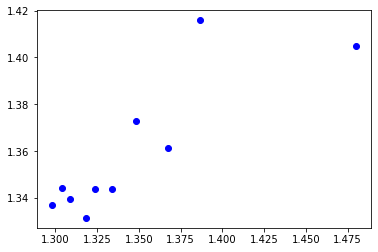

In [33]:
plotPerformance(loss_values, acc, val_loss_values,val_acc, 10)

In [13]:
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [14]:
loss_values

[1.4801,
 1.4047,
 1.3865,
 1.4159,
 1.3677,
 1.3612,
 1.3485,
 1.373,
 1.3337,
 1.3437,
 1.3239,
 1.3436,
 1.3181,
 1.3314,
 1.3085,
 1.3396,
 1.3038,
 1.3444,
 1.2978,
 1.3371]

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

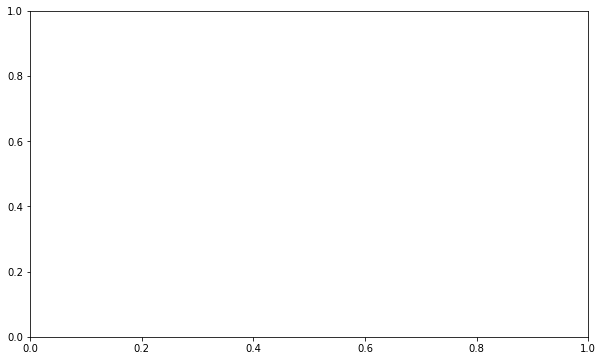

In [11]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_values, label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Create the RNN model with 90 nodes in the Embedding layer
embedding_nodes = 50
modelGlove = Sequential()

# Add the Embedding layer with the pre-trained word embeddings
modelGlove.add(Embedding(max_words, embedding_nodes, 
                         input_length=x_train.shape[1], 
                         weights=[embedding_matrix], trainable=True))

# Add the SimpleRNN layer
modelGlove.add(SimpleRNN(32))

# Add the output Dense layer with the appropriate activation function for classification
modelGlove.add(Dense(5, activation='softmax'))

# Compile the model
modelGlove.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
modelGlove.summary()

# Train the model with validation data
historyGlove50 = modelGlove.fit(x_train, y_train, validation_split=0.2,
                                   epochs=60, batch_size=32)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 50, 50)            750000    
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 32)                2656      
                                                                 
 dense_14 (Dense)            (None, 5)                 165       
                                                                 
Total params: 752821 (2.87 MB)
Trainable params: 752821 (2.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
550/550 [==============================] - 8s 12ms/step - loss: 1.4527 - accuracy: 0.3497 - val_loss: 1.3642 - val_accuracy: 0.3873
Epoch 2/60
550/550 [==============================] - 6s 11ms/step - loss: 1.3368 - accuracy: 0.4197 - val_loss: 1.3358 - val_accuracy: 0.

550/550 [==============================] - 6s 11ms/step - loss: 0.4447 - accuracy: 0.8165 - val_loss: 2.1774 - val_accuracy: 0.5173
Epoch 53/60
550/550 [==============================] - 6s 11ms/step - loss: 0.4375 - accuracy: 0.8162 - val_loss: 2.1429 - val_accuracy: 0.5316
Epoch 54/60
550/550 [==============================] - 6s 11ms/step - loss: 0.4242 - accuracy: 0.8220 - val_loss: 2.1498 - val_accuracy: 0.5393
Epoch 55/60
550/550 [==============================] - 6s 11ms/step - loss: 0.4224 - accuracy: 0.8209 - val_loss: 2.1747 - val_accuracy: 0.5293
Epoch 56/60
550/550 [==============================] - 6s 11ms/step - loss: 0.4219 - accuracy: 0.8240 - val_loss: 2.1799 - val_accuracy: 0.5327
Epoch 57/60
550/550 [==============================] - 6s 11ms/step - loss: 0.4221 - accuracy: 0.8215 - val_loss: 2.2201 - val_accuracy: 0.5320
Epoch 58/60
550/550 [==============================] - 6s 11ms/step - loss: 0.4210 - accuracy: 0.8230 - val_loss: 2.2179 - val_accuracy: 0.5355
Epoc

In [76]:
word_index2 = tokenizer.word_index
word_index2

{'not': 1,
 'good': 2,
 'app': 3,
 'netflix': 4,
 'movie': 5,
 'watch': 6,
 'show': 7,
 'like': 8,
 'please': 9,
 'cannot': 10,
 'love': 11,
 'time': 12,
 'no': 13,
 'nice': 14,
 'new': 15,
 'great': 16,
 'update': 17,
 'one': 18,
 'bad': 19,
 'get': 20,
 'watching': 21,
 'want': 22,
 'series': 23,
 'really': 24,
 'need': 25,
 'phone': 26,
 'even': 27,
 'fix': 28,
 'best': 29,
 'screen': 30,
 'use': 31,
 'back': 32,
 'account': 33,
 'would': 34,
 'video': 35,
 'problem': 36,
 'see': 37,
 'content': 38,
 'keep': 39,
 'u': 40,
 'work': 41,
 'make': 42,
 'add': 43,
 'thing': 44,
 'much': 45,
 'pay': 46,
 'issue': 47,
 'tv': 48,
 'go': 49,
 'working': 50,
 'option': 51,
 'every': 52,
 'still': 53,
 'service': 54,
 'subtitle': 55,
 'open': 56,
 'money': 57,
 'give': 58,
 'many': 59,
 'season': 60,
 'better': 61,
 'something': 62,
 'find': 63,
 'price': 64,
 'know': 65,
 'subscription': 66,
 'lot': 67,
 'black': 68,
 'day': 69,
 'star': 70,
 'change': 71,
 'also': 72,
 'people': 73,
 'play':

### Trying GloVe with 100 dimensions

In [81]:
import os
import numpy as np

glove_dir = 'glove.6B'

embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 7718 word vectors.


In [84]:
def create_embedding_matrix(word_index, embeddings_index, max_words, embedding_dim):
    embedding_matrix = np.zeros((max_words, embedding_dim))

    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if i < max_words:
            if embedding_vector is not None:
                # Words not found in the embedding index will be all-zeros.
                embedding_matrix[i] = embedding_vector

    return embedding_matrix


embedding_dim = 100  # Set to the desired embedding dimension (should match the dimension of your GloVe file)
max_words = 15000
maxlen = 50  # Set to the desired max sequence length
embedding_matrix100 = create_embedding_matrix(word_index, embeddings_index, max_words, embedding_dim)

print(embedding_matrix100)
print(embedding_matrix100.shape)


[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.19103999  0.17601     0.36919999 ... -0.59680003  0.080843
   0.27866   ]
 [-0.030769    0.11993     0.53908998 ... -0.52877998  0.17584001
   1.06500006]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
(15000, 100)


Firstly, we try to ensure the embedding layer of GloVe can have trainable=False. This is to ensure the pretrained weights do not get tuned too much

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Create the RNN model with 90 nodes in the Embedding layer
embedding_nodes = 100
modelGlove = Sequential()

# Add the Embedding layer with the pre-trained word embeddings
modelGlove.add(Embedding(max_words, embedding_nodes, 
                         input_length=x_train.shape[1], 
                         weights=[embedding_matrix100], trainable=False))

# Add the SimpleRNN layer
modelGlove.add(SimpleRNN(32))

# Add the output Dense layer with the appropriate activation function for classification
modelGlove.add(Dense(5, activation='softmax'))

# Compile the model
modelGlove.compile(optimizer='adam', loss='categorical_crossentropy', 
                   metrics=['accuracy'])

# Print model summary
modelGlove.summary()

# Train the model with validation data
history = modelGlove.fit(x_train, y_train, validation_split=0.2,
                                   epochs=10, batch_size=32)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 50, 100)           1500000   
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1504421 (5.74 MB)
Trainable params: 4421 (17.27 KB)
Non-trainable params: 1500000 (5.72 MB)
_________________________________________________________________
Epoch 1/10
550/550 [==============================] - 6s 8ms/step - loss: 1.4614 - accuracy: 0.3447 - val_loss: 1.4026 - val_accuracy: 0.3791
Epoch 2/10
550/550 [==============================] - 4s 7ms/step - loss: 1.3889 - accuracy: 0.3869 - val_loss: 1.3868 - val_accuracy: 

100 dimensions seem to underfit, hence we train another 50 more epochs. Also, we try to set trainable=True, as we tune the pretrained embedding layer to the context of our data

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Create the RNN model with 90 nodes in the Embedding layer
embedding_nodes = 100
modelGlove = Sequential()

# Add the Embedding layer with the pre-trained word embeddings
modelGlove.add(Embedding(max_words, embedding_nodes, input_length=x_train.shape[1], 
                         weights=[embedding_matrix100], trainable=True))

# Add the SimpleRNN layer
modelGlove.add(SimpleRNN(32))

# Add the output Dense layer with the appropriate activation function for classification
modelGlove.add(Dense(5, activation='softmax'))

# Compile the model
modelGlove.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
modelGlove.summary()

# Train the model with validation data
history = modelGlove.fit(x_train, y_train, validation_split=0.2,
                                   epochs=60, batch_size=32)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 50, 100)           1500000   
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                4256      
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1504421 (5.74 MB)
Trainable params: 1504421 (5.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
550/550 [==============================] - 8s 13ms/step - loss: 1.4441 - accuracy: 0.3574 - val_loss: 1.3625 - val_accuracy: 0.4116
Epoch 2/60
550/550 [==============================] - 7s 12ms/step - loss: 1.2816 - accuracy: 0.4602 - val_loss: 1.3201 - val_accuracy: 

550/550 [==============================] - 8s 14ms/step - loss: 0.4172 - accuracy: 0.8251 - val_loss: 2.2667 - val_accuracy: 0.5239
Epoch 53/60
550/550 [==============================] - 8s 14ms/step - loss: 0.4113 - accuracy: 0.8252 - val_loss: 2.2849 - val_accuracy: 0.5155
Epoch 54/60
550/550 [==============================] - 8s 14ms/step - loss: 0.4135 - accuracy: 0.8265 - val_loss: 2.2917 - val_accuracy: 0.5241
Epoch 55/60
550/550 [==============================] - 8s 14ms/step - loss: 0.4134 - accuracy: 0.8251 - val_loss: 2.3027 - val_accuracy: 0.5161
Epoch 56/60
550/550 [==============================] - 8s 14ms/step - loss: 0.4134 - accuracy: 0.8251 - val_loss: 2.3290 - val_accuracy: 0.5248
Epoch 57/60
550/550 [==============================] - 8s 14ms/step - loss: 0.4213 - accuracy: 0.8226 - val_loss: 2.3102 - val_accuracy: 0.5252
Epoch 58/60
550/550 [==============================] - 8s 15ms/step - loss: 0.4127 - accuracy: 0.8259 - val_loss: 2.3212 - val_accuracy: 0.5225
Epoc

Hence, we notice that even with 60 epochs, the model for GloVe embedding layer 100, validation accuracy stops at 43%.

In [113]:
modelEmbedding90 = create_model_v1(90)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 50, 90)            709110    
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                3936      
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 713211 (2.72 MB)
Trainable params: 713211 (2.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
historyEmbedding90 = modelEmbedding90.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=60,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/60
550/550 [==============================] - 7s 10ms/step - loss: 1.3958 - accuracy: 0.3919 - val_loss: 1.2713 - val_accuracy: 0.4657
Epoch 2/60
550/550 [==============================] - 5s 10ms/step - loss: 1.0582 - accuracy: 0.5877 - val_loss: 1.2318 - val_accuracy: 0.5093
Epoch 3/60
550/550 [==============================] - 5s 9ms/step - loss: 0.8157 - accuracy: 0.6888 - val_loss: 1.2928 - val_accuracy: 0.5068
Epoch 4/60
550/550 [==============================] - 6s 11ms/step - loss: 0.6901 - accuracy: 0.7351 - val_loss: 1.3666 - val_accuracy: 0.5139
Epoch 5/60
550/550 [==============================] - 6s 12ms/step - loss: 0.6177 - accuracy: 0.7541 - val_loss: 1.4860 - val_accuracy: 0.5207
Epoch 6/60
550/550 [==============================] - 6s 11ms/step - loss: 0.5793 - accuracy: 0.7688 - val_loss: 1.5437 - val_accuracy: 0.5182
Epoch 7/60
550/550 [==============================] - 6s 12ms/step - loss: 0.5571 - accuracy: 0.7763 - val_loss: 1.6097 - val_accuracy: 0.5220


Epoch 58/60
550/550 [==============================] - 6s 12ms/step - loss: 0.4189 - accuracy: 0.8213 - val_loss: 2.3401 - val_accuracy: 0.5218
Epoch 59/60
550/550 [==============================] - 6s 12ms/step - loss: 0.4149 - accuracy: 0.8243 - val_loss: 2.3719 - val_accuracy: 0.5245
Epoch 60/60
550/550 [==============================] - 6s 12ms/step - loss: 0.4113 - accuracy: 0.8236 - val_loss: 2.3610 - val_accuracy: 0.5225


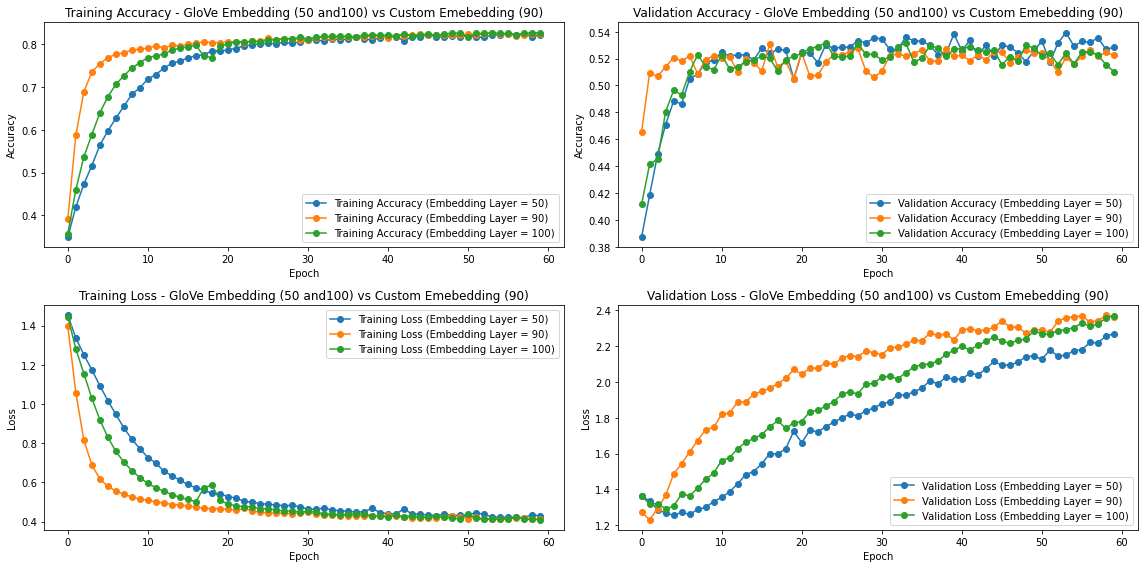

In [115]:
histories = [historyGlove50, historyEmbedding90, history]
title = 'GloVe Embedding (50 and100) vs Custom Emebedding (90)'
hyperparam_name = 'Embedding Layer'
hyperparam_values = [50, 90, 100]

plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

Hence, GloVe pretrained embedding = 50 is chosen

### Tuning Length of Sequences in X train (not used)

In [102]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
# import numpy as np

# def preprocess_and_split_data(data, labels, max_words, max_length=100, training_samples=1000, test_samples=100):
#     # Tokenize and pad the sequences
#     tokenizer = Tokenizer(num_words=max_words)
#     tokenizer.fit_on_texts(data)
#     tk = tokenizer.texts_to_sequences(data)
#     processed_data = pad_sequences(tk, maxlen=max_length)

#     # Shuffle and split the data
#     indices = np.arange(processed_data.shape[0])
#     np.random.shuffle(indices)
#     processed_data = processed_data[indices]
#     labels = labels[indices]
#     x_train = processed_data[:training_samples]
#     y_train = labels[:training_samples]
#     x_test = processed_data[training_samples: training_samples + test_samples]
#     y_test = labels[training_samples: training_samples + test_samples]
#     print('Before one hot encoding for y train:', y_train)
#     # Convert labels to categorical
#     num_classes = 5
#     y_train = y_train - 1
#     y_train = to_categorical(y_train, num_classes=num_classes)
#     print('After one hot encoding for y train:')

#     return x_train, y_train, x_test, y_test

In [106]:
# x_train2, y_train2, x_test2, y_test2 = preprocess_and_split_data(preprocessed_list,
#                                                              labels, 
#                                                              max_words=15000, 
#                                                              max_length=80, 
#                                                              training_samples=22500,
#                                                              test_samples=5500)

# print('X train shape:', x_train2.shape)

Before one hot encoding for y train: [4 4 2 ... 1 5 5]
After one hot encoding for y train:
X train shape: (22500, 80)


In [108]:
# x_train3, y_train3, x_test3, y_test3 = preprocess_and_split_data(preprocessed_list,
#                                                              labels, 
#                                                              max_words=15000, 
#                                                              max_length=100, 
#                                                              training_samples=22500,
#                                                              test_samples=5500)

# print('X train shape:', x_train3.shape)

Before one hot encoding for y train: [4 4 4 ... 3 3 4]
After one hot encoding for y train:
X train shape: (22500, 100)


In [119]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# # Create the RNN model with 90 nodes in the Embedding layer
# embedding_nodes = 50
# modelSeqLength80 = Sequential()

# # Add the Embedding layer with the pre-trained word embeddings
# modelSeqLength80.add(Embedding(max_words, embedding_nodes, 
#                          input_length=x_train2.shape[1], 
#                          weights=[embedding_matrix], trainable=True))

# # Add the SimpleRNN layer
# modelSeqLength80.add(SimpleRNN(32))

# # Add the output Dense layer with the appropriate activation function for classification
# modelSeqLength80.add(Dense(5, activation='softmax'))

# # Compile the model
# modelSeqLength80.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# modelSeqLength80.summary()

# # Train the model with validation data
# historySeqLength80 = modelSeqLength80.fit(x_train2, y_train2, validation_split=0.2,
#                                    epochs=10, batch_size=32)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 80, 50)            750000    
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 32)                2656      
                                                                 
 dense_19 (Dense)            (None, 5)                 165       
                                                                 
Total params: 752821 (2.87 MB)
Trainable params: 752821 (2.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
563/563 [==============================] - 10s 15ms/step - loss: 1.6441 - accuracy: 0.2025 - val_loss: 1.6227 - val_accuracy: 0.1967
Epoch 2/10
563/563 [==============================] - 9s 17ms/step - loss: 1.6020 - accuracy: 0.2326 - val_loss: 1.6220 - val_accuracy: 0

In [120]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# # Create the RNN model with 90 nodes in the Embedding layer
# embedding_nodes = 50
# modelSeqLength100 = Sequential()

# # Add the Embedding layer with the pre-trained word embeddings
# modelSeqLength100.add(Embedding(max_words, embedding_nodes, 
#                          input_length=x_train3.shape[1], 
#                          weights=[embedding_matrix], trainable=True))

# # Add the SimpleRNN layer
# modelSeqLength100.add(SimpleRNN(32))

# # Add the output Dense layer with the appropriate activation function for classification
# modelSeqLength100.add(Dense(5, activation='softmax'))

# # Compile the model
# modelSeqLength100.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# modelSeqLength100.summary()

# # Train the model with validation data
# historySeqLength100 = modelSeqLength100.fit(x_train3, y_train3, validation_split=0.2,
#                                    epochs=10, batch_size=32)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 100, 50)           750000    
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 32)                2656      
                                                                 
 dense_20 (Dense)            (None, 5)                 165       
                                                                 
Total params: 752821 (2.87 MB)
Trainable params: 752821 (2.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
563/563 [==============================] - 12s 19ms/step - loss: 1.6383 - accuracy: 0.2023 - val_loss: 1.6202 - val_accuracy: 0.1976
Epoch 2/10
563/563 [==============================] - 11s 19ms/step - loss: 1.6085 - accuracy: 0.2190 - val_loss: 1.6198 - val_accuracy: 

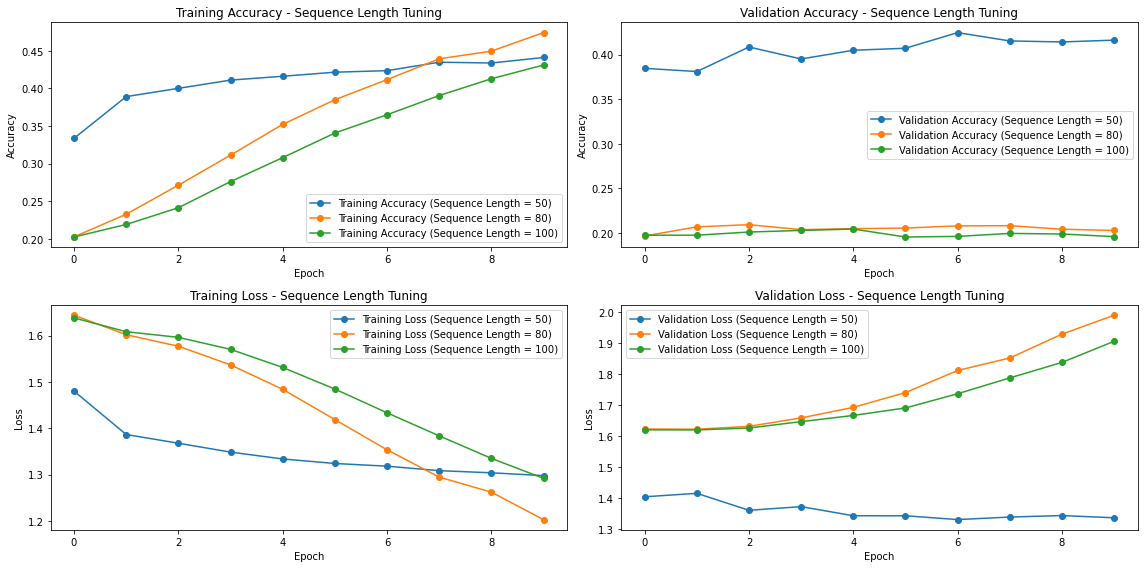

In [129]:
# histories = [historyGlove50_1, historySeqLength80, historySeqLength100]
# title = 'Sequence Length Tuning'
# hyperparam_name = 'Sequence Length'
# hyperparam_values = [50, 80, 100]

# plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

Hence, we keep the sequence length = 50

### Addressing Vanishing Gradient Problem
Long Short Term Memory (LSTM) models are introduced to overcome the weight update problem, also known as vanishing gradient problem. 

### Tuning number of hidden layers
- We try epoch = 30 as less computation resources are used to evaluate the number of hidden layers of the model

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model_lstm0 = Sequential()
model_lstm0.add(Embedding(vocab_size + 1, 90, input_length=x_train.shape[1]))
model_lstm0.add(LSTM(32))  # Choose either this layer or the one below
# model_lstm.add(LSTM(32, return_sequences=True))
model_lstm0.add(Dense(5, activation='softmax'))
model_lstm0.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics=['accuracy'])
model_lstm0.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 50, 90)            709110    
                                                                 
 lstm_12 (LSTM)              (None, 32)                15744     
                                                                 
 dense_28 (Dense)            (None, 5)                 165       
                                                                 
Total params: 725019 (2.77 MB)
Trainable params: 725019 (2.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size + 1, 90, input_length=x_train.shape[1]))
model_lstm.add(LSTM(32, return_sequences=True))  # LSTM layer with return_sequences=True
model_lstm.add(LSTM(32))  # LSTM layer without return_sequences
model_lstm.add(Dense(5, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 50, 90)            709110    
                                                                 
 lstm_2 (LSTM)               (None, 50, 32)            15744     
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_24 (Dense)            (None, 5)                 165       
                                                                 
Total params: 733339 (2.80 MB)
Trainable params: 733339 (2.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model_lstm2 = Sequential()
model_lstm2.add(Embedding(vocab_size + 1, 90, input_length=x_train.shape[1]))
model_lstm2.add(LSTM(32, return_sequences=True))  # LSTM layer with return_sequences=True
model_lstm2.add(LSTM(32, return_sequences=True))  # LSTM layer with return_sequences=True
model_lstm2.add(LSTM(32))  # LSTM layer without return_sequences
model_lstm2.add(Dense(5, activation='softmax'))
model_lstm2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 50, 90)            709110    
                                                                 
 lstm_4 (LSTM)               (None, 50, 32)            15744     
                                                                 
 lstm_5 (LSTM)               (None, 50, 32)            8320      
                                                                 
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dense_25 (Dense)            (None, 5)                 165       
                                                                 
Total params: 741659 (2.83 MB)
Trainable params: 741659 (2.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model_lstm3 = Sequential()
model_lstm3.add(Embedding(vocab_size + 1, 90, input_length=x_train.shape[1]))
model_lstm3.add(LSTM(32, return_sequences=True))  # LSTM layer with return_sequences=True
model_lstm3.add(LSTM(32, return_sequences=True))  # LSTM layer with return_sequences=True
model_lstm3.add(LSTM(32, return_sequences=True))  # LSTM layer with return_sequences=True
model_lstm3.add(LSTM(32))  # LSTM layer without return_sequences
model_lstm3.add(Dense(5, activation='softmax'))
model_lstm3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 50, 90)            709110    
                                                                 
 lstm_7 (LSTM)               (None, 50, 32)            15744     
                                                                 
 lstm_8 (LSTM)               (None, 50, 32)            8320      
                                                                 
 lstm_9 (LSTM)               (None, 50, 32)            8320      
                                                                 
 lstm_10 (LSTM)              (None, 32)                8320      
                                                                 
 dense_26 (Dense)            (None, 5)                 165       
                                                                 
Total params: 749979 (2.86 MB)
Trainable params: 7499

In [141]:
history_lstm0 = model_lstm0.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=30,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/30
550/550 [==============================] - 13s 19ms/step - loss: 1.3692 - accuracy: 0.4014 - val_loss: 1.2698 - val_accuracy: 0.4511
Epoch 2/30
550/550 [==============================] - 11s 19ms/step - loss: 1.1828 - accuracy: 0.5057 - val_loss: 1.2498 - val_accuracy: 0.4739
Epoch 3/30
550/550 [==============================] - 11s 19ms/step - loss: 1.0601 - accuracy: 0.5717 - val_loss: 1.2572 - val_accuracy: 0.4850
Epoch 4/30
550/550 [==============================] - 10s 19ms/step - loss: 0.9556 - accuracy: 0.6176 - val_loss: 1.2793 - val_accuracy: 0.4982
Epoch 5/30
550/550 [==============================] - 11s 19ms/step - loss: 0.8746 - accuracy: 0.6518 - val_loss: 1.3331 - val_accuracy: 0.5045
Epoch 6/30
550/550 [==============================] - 10s 19ms/step - loss: 0.8109 - accuracy: 0.6716 - val_loss: 1.3659 - val_accuracy: 0.5089
Epoch 7/30
550/550 [==============================] - 11s 19ms/step - loss: 0.7616 - accuracy: 0.6914 - val_loss: 1.4289 - val_accuracy:

In [132]:
history_lstm = model_lstm.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=30,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/30
550/550 [==============================] - 18s 26ms/step - loss: 1.3877 - accuracy: 0.3845 - val_loss: 1.2938 - val_accuracy: 0.4402
Epoch 2/30
550/550 [==============================] - 13s 24ms/step - loss: 1.2113 - accuracy: 0.4872 - val_loss: 1.2642 - val_accuracy: 0.4664
Epoch 3/30
550/550 [==============================] - 16s 29ms/step - loss: 1.0988 - accuracy: 0.5512 - val_loss: 1.2662 - val_accuracy: 0.4748
Epoch 4/30
550/550 [==============================] - 16s 29ms/step - loss: 0.9895 - accuracy: 0.6025 - val_loss: 1.2901 - val_accuracy: 0.4900
Epoch 5/30
550/550 [==============================] - 16s 29ms/step - loss: 0.9013 - accuracy: 0.6349 - val_loss: 1.3100 - val_accuracy: 0.5002
Epoch 6/30
550/550 [==============================] - 16s 29ms/step - loss: 0.8296 - accuracy: 0.6699 - val_loss: 1.3809 - val_accuracy: 0.5109
Epoch 7/30
550/550 [==============================] - 16s 29ms/step - loss: 0.7792 - accuracy: 0.6847 - val_loss: 1.4216 - val_accuracy:

In [135]:
history_lstm2 = model_lstm2.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=30,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/30
550/550 [==============================] - 29s 47ms/step - loss: 1.4203 - accuracy: 0.3671 - val_loss: 1.2961 - val_accuracy: 0.4430
Epoch 2/30
550/550 [==============================] - 24s 45ms/step - loss: 1.2403 - accuracy: 0.4675 - val_loss: 1.2782 - val_accuracy: 0.4543
Epoch 3/30
550/550 [==============================] - 24s 44ms/step - loss: 1.1439 - accuracy: 0.5235 - val_loss: 1.2655 - val_accuracy: 0.4718
Epoch 4/30
550/550 [==============================] - 24s 44ms/step - loss: 1.0617 - accuracy: 0.5722 - val_loss: 1.2987 - val_accuracy: 0.4759
Epoch 5/30
550/550 [==============================] - 26s 47ms/step - loss: 0.9975 - accuracy: 0.6041 - val_loss: 1.3409 - val_accuracy: 0.4809
Epoch 6/30
550/550 [==============================] - 26s 47ms/step - loss: 0.9373 - accuracy: 0.6291 - val_loss: 1.3044 - val_accuracy: 0.4805
Epoch 7/30
550/550 [==============================] - 25s 46ms/step - loss: 0.8827 - accuracy: 0.6542 - val_loss: 1.3649 - val_accuracy:

In [137]:
history_lstm3 = model_lstm3.fit(
    x_train, y_train,
    validation_split=0.2,  # Adjust the validation split as needed
    epochs=30,
    batch_size=32,
    #callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/30
550/550 [==============================] - 41s 61ms/step - loss: 1.4514 - accuracy: 0.3426 - val_loss: 1.3234 - val_accuracy: 0.4195
Epoch 2/30
550/550 [==============================] - 32s 58ms/step - loss: 1.2674 - accuracy: 0.4553 - val_loss: 1.2793 - val_accuracy: 0.4523
Epoch 3/30
550/550 [==============================] - 32s 57ms/step - loss: 1.1693 - accuracy: 0.5081 - val_loss: 1.2724 - val_accuracy: 0.4680
Epoch 4/30
550/550 [==============================] - 32s 58ms/step - loss: 1.0899 - accuracy: 0.5555 - val_loss: 1.2927 - val_accuracy: 0.4748
Epoch 5/30
550/550 [==============================] - 32s 58ms/step - loss: 1.0181 - accuracy: 0.5940 - val_loss: 1.3084 - val_accuracy: 0.4875
Epoch 6/30
550/550 [==============================] - 32s 58ms/step - loss: 0.9583 - accuracy: 0.6203 - val_loss: 1.3245 - val_accuracy: 0.4911
Epoch 7/30
550/550 [==============================] - 30s 55ms/step - loss: 0.8991 - accuracy: 0.6464 - val_loss: 1.3356 - val_accuracy:

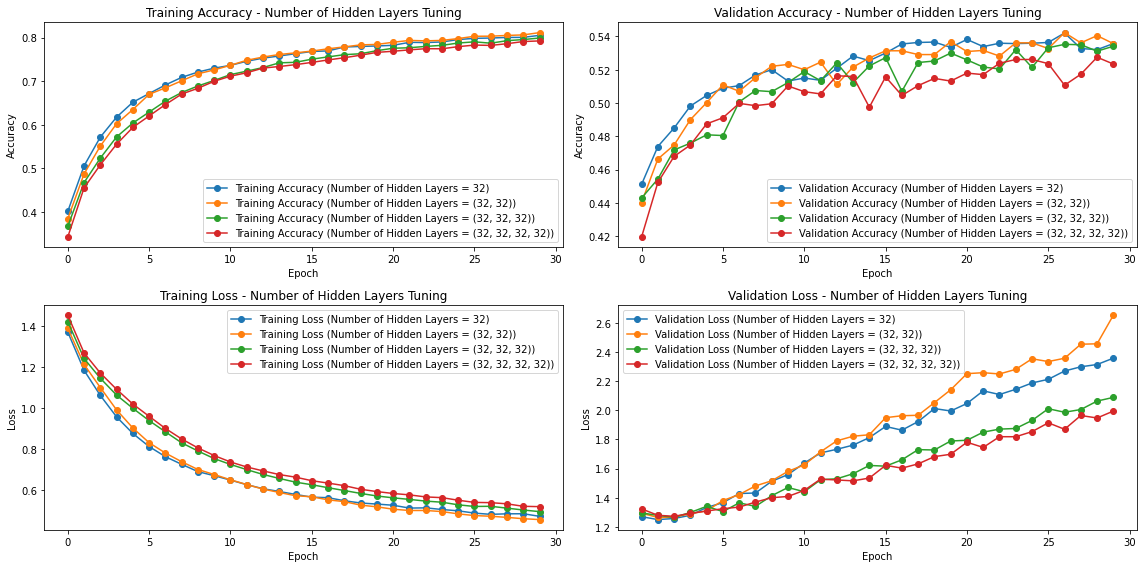

In [143]:
histories = [history_lstm0, history_lstm, history_lstm2, history_lstm3]
title = 'Number of Hidden Layers Tuning'
hyperparam_name = 'Number of Hidden Layers'
hyperparam_values = [(32), (32,32), (32,32,32), (32,32,32,32)]

plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

Hence we go with (32, 32)

### Tuning Learning Rate

https://www.jeremyjordan.me/nn-learning-rate/

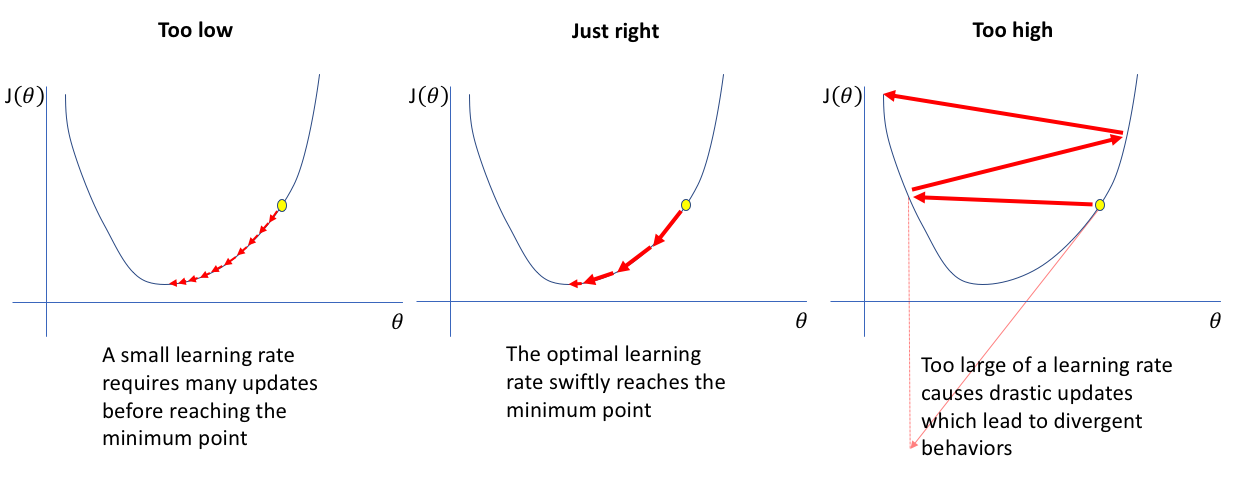


In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

def create_lstm_model(learning_rate):
    embedding_nodes = 50
    model_lstm = Sequential()
    model_lstm.add(Embedding(max_words, embedding_nodes, input_length=x_train.shape[1],
                             weights=[embedding_matrix], trainable=True))
    model_lstm.add(LSTM(32, return_sequences=True))  # LSTM layer with return_sequences=True
    model_lstm.add(LSTM(32))  # LSTM layer without return_sequences
    model_lstm.add(Dense(5, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model_lstm

In [168]:
model_lstmLR1 = create_lstm_model(learning_rate=0.001)
model_lstmLR1.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_21 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_22 (LSTM)              (None, 32)                8320      
                                                                 
 dense_33 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [169]:
model_lstmLR2 = create_lstm_model(learning_rate=0.002)
model_lstmLR2.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_23 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_24 (LSTM)              (None, 32)                8320      
                                                                 
 dense_34 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [170]:
model_lstmLR3 = create_lstm_model(learning_rate=0.005)
model_lstmLR3.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_25 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_26 (LSTM)              (None, 32)                8320      
                                                                 
 dense_35 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [171]:
model_lstmLR4 = create_lstm_model(learning_rate=0.01)
model_lstmLR4.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_27 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_28 (LSTM)              (None, 32)                8320      
                                                                 
 dense_36 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
# Train the model with validation data
history_lstmLR1 = model_lstmLR1.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=batch_size)

Epoch 1/30
550/550 [==============================] - 21s 32ms/step - loss: 1.3865 - accuracy: 0.3893 - val_loss: 1.3017 - val_accuracy: 0.4364
Epoch 2/30
550/550 [==============================] - 17s 32ms/step - loss: 1.2707 - accuracy: 0.4494 - val_loss: 1.2737 - val_accuracy: 0.4507
Epoch 3/30
550/550 [==============================] - 17s 31ms/step - loss: 1.2119 - accuracy: 0.4856 - val_loss: 1.2582 - val_accuracy: 0.4664
Epoch 4/30
550/550 [==============================] - 17s 31ms/step - loss: 1.1477 - accuracy: 0.5224 - val_loss: 1.2634 - val_accuracy: 0.4736
Epoch 5/30
550/550 [==============================] - 18s 32ms/step - loss: 1.0802 - accuracy: 0.5606 - val_loss: 1.2633 - val_accuracy: 0.4766
Epoch 6/30
550/550 [==============================] - 17s 31ms/step - loss: 1.0105 - accuracy: 0.5952 - val_loss: 1.2786 - val_accuracy: 0.4914
Epoch 7/30
550/550 [==============================] - 17s 31ms/step - loss: 0.9425 - accuracy: 0.6249 - val_loss: 1.2959 - val_accuracy:

In [173]:
# Train the model with validation data
history_lstmLR2 = model_lstmLR2.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=batch_size)

Epoch 1/30
550/550 [==============================] - 22s 33ms/step - loss: 1.3560 - accuracy: 0.4009 - val_loss: 1.2861 - val_accuracy: 0.4420
Epoch 2/30
550/550 [==============================] - 18s 32ms/step - loss: 1.2283 - accuracy: 0.4714 - val_loss: 1.2544 - val_accuracy: 0.4670
Epoch 3/30
550/550 [==============================] - 18s 32ms/step - loss: 1.1361 - accuracy: 0.5266 - val_loss: 1.2489 - val_accuracy: 0.4859
Epoch 4/30
550/550 [==============================] - 17s 32ms/step - loss: 1.0318 - accuracy: 0.5805 - val_loss: 1.2573 - val_accuracy: 0.4977
Epoch 5/30
550/550 [==============================] - 17s 31ms/step - loss: 0.9351 - accuracy: 0.6241 - val_loss: 1.2924 - val_accuracy: 0.5000
Epoch 6/30
550/550 [==============================] - 18s 32ms/step - loss: 0.8526 - accuracy: 0.6624 - val_loss: 1.3690 - val_accuracy: 0.5120
Epoch 7/30
550/550 [==============================] - 17s 31ms/step - loss: 0.7823 - accuracy: 0.6880 - val_loss: 1.3864 - val_accuracy:

In [174]:
# Train the model with validation data
history_lstmLR3 = model_lstmLR3.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=batch_size)

Epoch 1/30
550/550 [==============================] - 22s 34ms/step - loss: 1.3341 - accuracy: 0.4061 - val_loss: 1.2603 - val_accuracy: 0.4455
Epoch 2/30
550/550 [==============================] - 17s 32ms/step - loss: 1.1829 - accuracy: 0.4988 - val_loss: 1.2512 - val_accuracy: 0.4775
Epoch 3/30
550/550 [==============================] - 17s 31ms/step - loss: 1.0355 - accuracy: 0.5791 - val_loss: 1.2579 - val_accuracy: 0.4875
Epoch 4/30
550/550 [==============================] - 17s 32ms/step - loss: 0.8897 - accuracy: 0.6395 - val_loss: 1.3201 - val_accuracy: 0.5114
Epoch 5/30
550/550 [==============================] - 17s 31ms/step - loss: 0.7718 - accuracy: 0.6882 - val_loss: 1.4213 - val_accuracy: 0.5061
Epoch 6/30
550/550 [==============================] - 17s 31ms/step - loss: 0.6977 - accuracy: 0.7165 - val_loss: 1.4644 - val_accuracy: 0.5284
Epoch 7/30
550/550 [==============================] - 17s 31ms/step - loss: 0.6316 - accuracy: 0.7432 - val_loss: 1.6530 - val_accuracy:

In [175]:
# Train the model with validation data
history_lstmLR4 = model_lstmLR4.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=batch_size)

Epoch 1/30
550/550 [==============================] - 22s 33ms/step - loss: 1.3270 - accuracy: 0.4159 - val_loss: 1.2605 - val_accuracy: 0.4555
Epoch 2/30
550/550 [==============================] - 18s 32ms/step - loss: 1.1610 - accuracy: 0.5168 - val_loss: 1.2706 - val_accuracy: 0.4714
Epoch 3/30
550/550 [==============================] - 18s 32ms/step - loss: 1.0253 - accuracy: 0.5798 - val_loss: 1.2894 - val_accuracy: 0.4870
Epoch 4/30
550/550 [==============================] - 17s 32ms/step - loss: 0.9201 - accuracy: 0.6290 - val_loss: 1.2792 - val_accuracy: 0.4968
Epoch 5/30
550/550 [==============================] - 17s 32ms/step - loss: 0.8267 - accuracy: 0.6660 - val_loss: 1.3761 - val_accuracy: 0.5123
Epoch 6/30
550/550 [==============================] - 18s 32ms/step - loss: 0.7652 - accuracy: 0.6899 - val_loss: 1.4679 - val_accuracy: 0.5118
Epoch 7/30
550/550 [==============================] - 17s 32ms/step - loss: 0.7286 - accuracy: 0.7038 - val_loss: 1.4704 - val_accuracy:

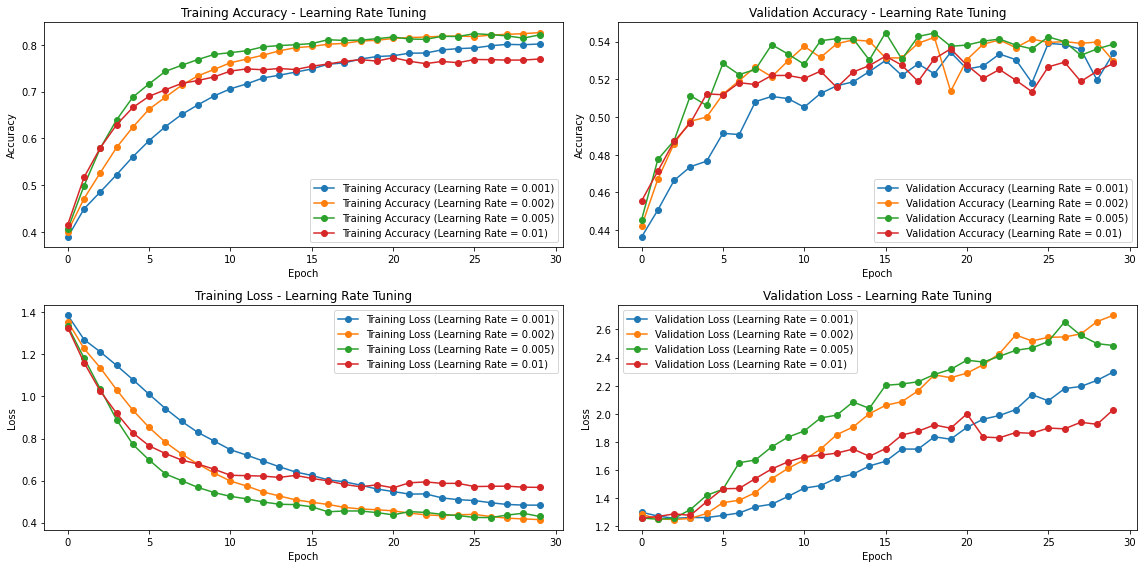

In [176]:
histories = [history_lstmLR1, history_lstmLR2, history_lstmLR3, history_lstmLR4]
title = 'Learning Rate Tuning'
hyperparam_name = 'Learning Rate'
hyperparam_values = [0.001, 0.002, 0.005, 0.01]

plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

Hence we take LR = 0.005, as its validation accuracy is at 54.48%

### Batch Sizes Tuning

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

def create_lstm_model(batch_size):
    embedding_nodes = 50
    model_lstm = Sequential()
    model_lstm.add(Embedding(max_words, embedding_nodes, input_length=x_train.shape[1],
                             weights=[embedding_matrix], trainable=True))
    model_lstm.add(LSTM(32, return_sequences=True))  # LSTM layer with return_sequences=True
    model_lstm.add(LSTM(32))  # LSTM layer without return_sequences
    model_lstm.add(Dense(5, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.005)
    
    model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model_lstm


In [189]:
model_lstmBS = create_lstm_model(batch_size=8)
model_lstmBS.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_51 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_43 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_44 (LSTM)              (None, 32)                8320      
                                                                 
 dense_44 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [184]:
model_lstmBS2 = create_lstm_model(batch_size=16)
model_lstmBS.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_46 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_33 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_34 (LSTM)              (None, 32)                8320      
                                                                 
 dense_39 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [185]:
model_lstmBS3 = create_lstm_model(batch_size=64)
model_lstmBS3.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_48 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_37 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_38 (LSTM)              (None, 32)                8320      
                                                                 
 dense_41 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
model_lstmBS4 = create_lstm_model(batch_size=128)
model_lstmBS4.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_39 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_40 (LSTM)              (None, 32)                8320      
                                                                 
 dense_42 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
model_lstmBS5 = create_lstm_model(batch_size=256)
model_lstmBS5.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_50 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_41 (LSTM)              (None, 50, 32)            10624     
                                                                 
 lstm_42 (LSTM)              (None, 32)                8320      
                                                                 
 dense_43 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
# Train the model with validation data
history_lstmBS = model_lstmBS.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=8)

Epoch 1/30
2200/2200 [==============================] - 50s 21ms/step - loss: 1.3242 - accuracy: 0.4173 - val_loss: 1.2651 - val_accuracy: 0.4520
Epoch 2/30
2200/2200 [==============================] - 51s 23ms/step - loss: 1.1693 - accuracy: 0.5088 - val_loss: 1.2506 - val_accuracy: 0.4814
Epoch 3/30
2200/2200 [==============================] - 49s 22ms/step - loss: 1.0277 - accuracy: 0.5744 - val_loss: 1.2717 - val_accuracy: 0.4934
Epoch 4/30
2200/2200 [==============================] - 53s 24ms/step - loss: 0.9017 - accuracy: 0.6340 - val_loss: 1.3441 - val_accuracy: 0.5023
Epoch 5/30
2200/2200 [==============================] - 51s 23ms/step - loss: 0.8131 - accuracy: 0.6701 - val_loss: 1.3578 - val_accuracy: 0.5150
Epoch 6/30
2200/2200 [==============================] - 50s 23ms/step - loss: 0.7462 - accuracy: 0.6983 - val_loss: 1.4653 - val_accuracy: 0.5270
Epoch 7/30
2200/2200 [==============================] - 51s 23ms/step - loss: 0.6988 - accuracy: 0.7183 - val_loss: 1.4826 -

In [191]:
# Train the model with validation data
history_lstmBS2 = model_lstmBS2.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=16)

Epoch 1/30
1100/1100 [==============================] - 33s 27ms/step - loss: 1.3279 - accuracy: 0.4144 - val_loss: 1.2692 - val_accuracy: 0.4543
Epoch 2/30
1100/1100 [==============================] - 27s 25ms/step - loss: 1.1707 - accuracy: 0.5095 - val_loss: 1.2658 - val_accuracy: 0.4582
Epoch 3/30
1100/1100 [==============================] - 28s 25ms/step - loss: 1.0292 - accuracy: 0.5815 - val_loss: 1.2435 - val_accuracy: 0.5016
Epoch 4/30
1100/1100 [==============================] - 27s 24ms/step - loss: 0.8959 - accuracy: 0.6369 - val_loss: 1.3255 - val_accuracy: 0.5041
Epoch 5/30
1100/1100 [==============================] - 27s 24ms/step - loss: 0.7984 - accuracy: 0.6797 - val_loss: 1.3984 - val_accuracy: 0.5111
Epoch 6/30
1100/1100 [==============================] - 27s 24ms/step - loss: 0.7226 - accuracy: 0.7062 - val_loss: 1.5113 - val_accuracy: 0.5205
Epoch 7/30
1100/1100 [==============================] - 27s 25ms/step - loss: 0.6646 - accuracy: 0.7270 - val_loss: 1.5879 -

In [192]:
# Train the model with validation data
history_lstmBS3 = model_lstmBS3.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=64)

Epoch 1/30
275/275 [==============================] - 14s 37ms/step - loss: 1.3399 - accuracy: 0.4106 - val_loss: 1.2758 - val_accuracy: 0.4466
Epoch 2/30
275/275 [==============================] - 10s 35ms/step - loss: 1.2025 - accuracy: 0.4888 - val_loss: 1.2473 - val_accuracy: 0.4748
Epoch 3/30
275/275 [==============================] - 10s 37ms/step - loss: 1.0739 - accuracy: 0.5593 - val_loss: 1.2605 - val_accuracy: 0.4902
Epoch 4/30
275/275 [==============================] - 10s 36ms/step - loss: 0.9459 - accuracy: 0.6197 - val_loss: 1.2912 - val_accuracy: 0.5082
Epoch 5/30
275/275 [==============================] - 11s 39ms/step - loss: 0.8295 - accuracy: 0.6686 - val_loss: 1.3420 - val_accuracy: 0.5223
Epoch 6/30
275/275 [==============================] - 9s 34ms/step - loss: 0.7430 - accuracy: 0.7043 - val_loss: 1.4869 - val_accuracy: 0.5139
Epoch 7/30
275/275 [==============================] - 10s 35ms/step - loss: 0.6790 - accuracy: 0.7240 - val_loss: 1.4600 - val_accuracy: 

In [193]:
# Train the model with validation data
history_lstmBS4 = model_lstmBS4.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=128)

Epoch 1/30
138/138 [==============================] - 12s 58ms/step - loss: 1.3653 - accuracy: 0.3997 - val_loss: 1.2913 - val_accuracy: 0.4370
Epoch 2/30
138/138 [==============================] - 7s 52ms/step - loss: 1.2260 - accuracy: 0.4734 - val_loss: 1.2641 - val_accuracy: 0.4659
Epoch 3/30
138/138 [==============================] - 7s 52ms/step - loss: 1.1077 - accuracy: 0.5414 - val_loss: 1.2413 - val_accuracy: 0.4832
Epoch 4/30
138/138 [==============================] - 7s 52ms/step - loss: 0.9831 - accuracy: 0.6012 - val_loss: 1.2874 - val_accuracy: 0.5107
Epoch 5/30
138/138 [==============================] - 7s 51ms/step - loss: 0.8700 - accuracy: 0.6550 - val_loss: 1.3488 - val_accuracy: 0.5061
Epoch 6/30
138/138 [==============================] - 8s 57ms/step - loss: 0.7871 - accuracy: 0.6875 - val_loss: 1.3931 - val_accuracy: 0.5189
Epoch 7/30
138/138 [==============================] - 8s 56ms/step - loss: 0.7176 - accuracy: 0.7147 - val_loss: 1.5149 - val_accuracy: 0.524

In [194]:
# Train the model with validation data
history_lstmBS5 = model_lstmBS5.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=256)

Epoch 1/30
69/69 [==============================] - 10s 85ms/step - loss: 1.3867 - accuracy: 0.3887 - val_loss: 1.3021 - val_accuracy: 0.4214
Epoch 2/30
69/69 [==============================] - 5s 77ms/step - loss: 1.2483 - accuracy: 0.4655 - val_loss: 1.2708 - val_accuracy: 0.4466
Epoch 3/30
69/69 [==============================] - 6s 81ms/step - loss: 1.1563 - accuracy: 0.5153 - val_loss: 1.2735 - val_accuracy: 0.4573
Epoch 4/30
69/69 [==============================] - 6s 84ms/step - loss: 1.0643 - accuracy: 0.5660 - val_loss: 1.2713 - val_accuracy: 0.4884
Epoch 5/30
69/69 [==============================] - 6s 82ms/step - loss: 0.9667 - accuracy: 0.6138 - val_loss: 1.2971 - val_accuracy: 0.5014
Epoch 6/30
69/69 [==============================] - 5s 79ms/step - loss: 0.8819 - accuracy: 0.6505 - val_loss: 1.3179 - val_accuracy: 0.5084
Epoch 7/30
69/69 [==============================] - 5s 79ms/step - loss: 0.8105 - accuracy: 0.6786 - val_loss: 1.3692 - val_accuracy: 0.5152
Epoch 8/30
6

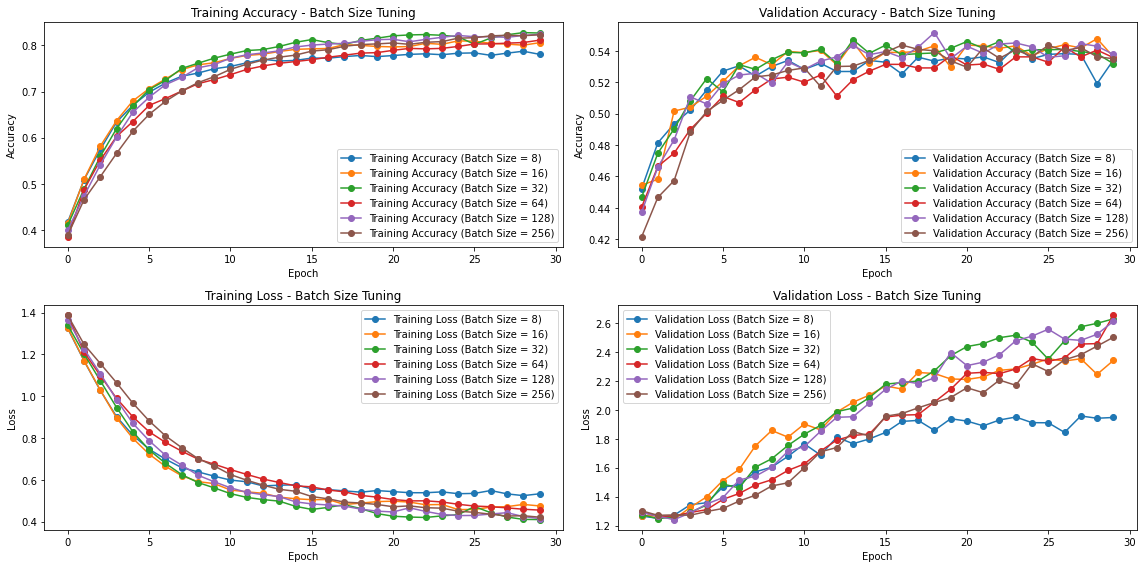

In [196]:
histories = [history_lstmBS, history_lstmBS2, history_lstmBS3, history_lstm, history_lstmBS4, history_lstmBS5]
title = 'Batch Size Tuning'
hyperparam_name = 'Batch Size'
hyperparam_values = [8, 16, 32, 64, 128, 256]

plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

We can stop training at epoch = 20. Also, batch size = 128 is used

### Tuning Spatial Dropout 1D

Spatial Dropout is a kind of dropout regularisation, designed to work specially for spatial data, like images or sequences. Even though it is commonly associated with Convolutional Neural Networks (CNN), we can apply this to 1D sequences, like those used for LSTM models.

1D sequences wise, in the context of LSTM, the input is a sequence of vectors. Since each element in the sequence represents a feature, spatial dropout is applied to all the features at once. It randomly drops entire features along the sequence, thus helping the model to be more robust by preventing co-adaptation of the features. This is useful for preventing overfitting in LSTM.

### Example of Normal Dropout

In normal dropout, we randomly remove nodes from the neural network during training. More precisely, it sets up a probability on each node. The probability refers to chance that the node is included in the training each iteration of learning. If let's say, 0.5 is assigned to each node, at each iteration, the learning algorithm will flip a coin for each node to decide if that node is removed from the network or not. An illustration is as follows:

https://www.baeldung.com/cs/ml-relu-dropout-layers

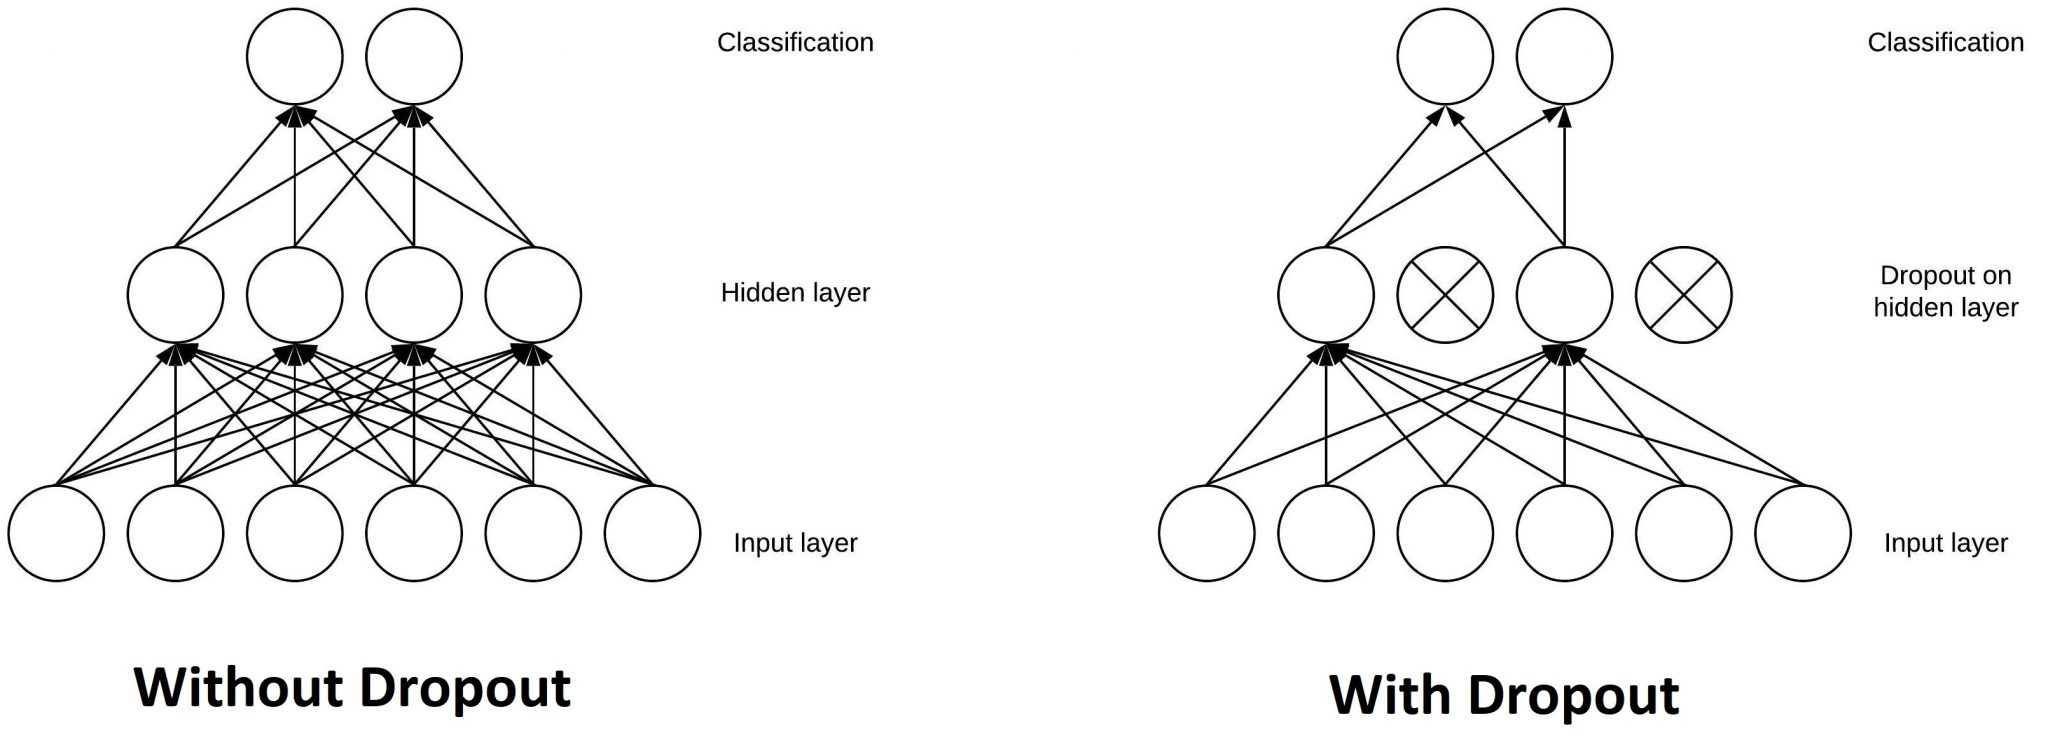

Hence when some nodes are dropout, the calculation of loss, backpropagation etc, are to be calculated in the smaller network with some nodes taken away. Hence updating the nodes only present during that iteration.

- Since a smaller neural network provides less flexibility, hence the chance of overfitting to data is lower. 
- Since randomly removing inputs at each layer in network, the overall network is less sensitive to single outputs. By removing weights from training process at random, dropout will force the other weights to particiapte in the learning process of that iteration, resulting in final weight values better spread out more.

### Spatial Dropout 1D
https://zhuanlan.zhihu.com/p/367799708

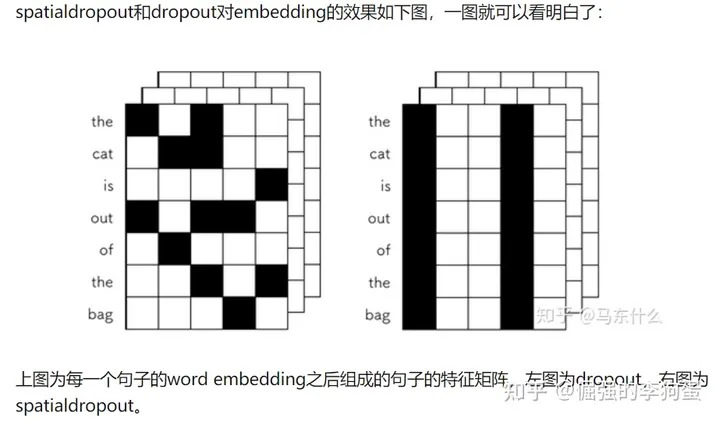

In the left part of the image, we see a matrix representing word embeddings for a sentence. Each row could correspond to a word vector, and each column represents a dimension within the embedding space. Regular dropout, which is referred to in the text above the matrix, are black squares scattered randomly across the matrix. 

Regular dropout works by randomly setting a subset of the individual elements in the input matrix to zero during training. This helps prevent overfitting by ensuring that the network does not become overly reliant on any single input node.

In the right part of the image, we see spatial dropout being applied. Unlike regular dropout, spatial dropout removes entire channels (in this case, entire columns which correspond to specific features across all word embeddings). This is done by setting them to zero. This is shown by the vertical stripes, where entire columns are blacked out. Hence for word embeddings, this means that all words in the sentence would have specific features of their embedding vectors dropped.

Hence spatial dropouts remove entire feature dimensions (in word embeddings), rather than individual elements, and is beneficial for the model to not rely on one particular feature for word embedding

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

def create_lstm_model(dropout_rate=0.2):
    embedding_nodes = 50
    model_lstm = Sequential()
    model_lstm.add(Embedding(max_words, embedding_nodes, input_length=x_train.shape[1],
                             weights=[embedding_matrix], trainable=True))
    model_lstm.add(LSTM(32, return_sequences=True))
    model_lstm.add(SpatialDropout1D(dropout_rate))  # Spatial Dropout layer for 1D sequences
    model_lstm.add(LSTM(32))
    #model_lstm.add(SpatialDropout1D(dropout_rate))  # Spatial Dropout layer for 1D sequences
    model_lstm.add(Dense(5, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.005)
    
    model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model_lstm


In [200]:
model_lstmSDropout1 = create_lstm_model(dropout_rate=0.2)
model_lstmSDropout1.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_53 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_47 (LSTM)              (None, 50, 32)            10624     
                                                                 
 spatial_dropout1d_2 (Spati  (None, 50, 32)            0         
 alDropout1D)                                                    
                                                                 
 lstm_48 (LSTM)              (None, 32)                8320      
                                                                 
 dense_45 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [201]:
model_lstmSDropout2 = create_lstm_model(dropout_rate=0.3)
model_lstmSDropout2.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_54 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_49 (LSTM)              (None, 50, 32)            10624     
                                                                 
 spatial_dropout1d_3 (Spati  (None, 50, 32)            0         
 alDropout1D)                                                    
                                                                 
 lstm_50 (LSTM)              (None, 32)                8320      
                                                                 
 dense_46 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [202]:
model_lstmSDropout3 = create_lstm_model(dropout_rate=0.4)
model_lstmSDropout3.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_55 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_51 (LSTM)              (None, 50, 32)            10624     
                                                                 
 spatial_dropout1d_4 (Spati  (None, 50, 32)            0         
 alDropout1D)                                                    
                                                                 
 lstm_52 (LSTM)              (None, 32)                8320      
                                                                 
 dense_47 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [203]:
model_lstmSDropout4 = create_lstm_model(dropout_rate=0.5)
model_lstmSDropout4.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_56 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_53 (LSTM)              (None, 50, 32)            10624     
                                                                 
 spatial_dropout1d_5 (Spati  (None, 50, 32)            0         
 alDropout1D)                                                    
                                                                 
 lstm_54 (LSTM)              (None, 32)                8320      
                                                                 
 dense_48 (Dense)            (None, 5)                 165       
                                                                 
Total params: 769109 (2.93 MB)
Trainable params: 769109 (2.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [204]:
# Train the model with validation data
history_lstmSDropout1 = model_lstmSDropout1.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=128)

Epoch 1/30
138/138 [==============================] - 10s 47ms/step - loss: 1.3805 - accuracy: 0.3895 - val_loss: 1.3101 - val_accuracy: 0.4234
Epoch 2/30
138/138 [==============================] - 6s 40ms/step - loss: 1.2403 - accuracy: 0.4635 - val_loss: 1.2549 - val_accuracy: 0.4655
Epoch 3/30
138/138 [==============================] - 6s 41ms/step - loss: 1.1459 - accuracy: 0.5212 - val_loss: 1.2424 - val_accuracy: 0.4752
Epoch 4/30
138/138 [==============================] - 6s 42ms/step - loss: 1.0546 - accuracy: 0.5689 - val_loss: 1.2863 - val_accuracy: 0.4836
Epoch 5/30
138/138 [==============================] - 8s 55ms/step - loss: 0.9805 - accuracy: 0.6073 - val_loss: 1.3027 - val_accuracy: 0.4934
Epoch 6/30
138/138 [==============================] - 8s 55ms/step - loss: 0.9030 - accuracy: 0.6400 - val_loss: 1.3655 - val_accuracy: 0.5061
Epoch 7/30
138/138 [==============================] - 7s 53ms/step - loss: 0.8357 - accuracy: 0.6657 - val_loss: 1.3996 - val_accuracy: 0.510

In [205]:
# Train the model with validation data
history_lstmSDropout2 = model_lstmSDropout2.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=128)

Epoch 1/30
138/138 [==============================] - 11s 51ms/step - loss: 1.3749 - accuracy: 0.3923 - val_loss: 1.2960 - val_accuracy: 0.4364
Epoch 2/30
138/138 [==============================] - 7s 50ms/step - loss: 1.2467 - accuracy: 0.4569 - val_loss: 1.2557 - val_accuracy: 0.4577
Epoch 3/30
138/138 [==============================] - 7s 51ms/step - loss: 1.1550 - accuracy: 0.5134 - val_loss: 1.2477 - val_accuracy: 0.4648
Epoch 4/30
138/138 [==============================] - 7s 51ms/step - loss: 1.0664 - accuracy: 0.5628 - val_loss: 1.2706 - val_accuracy: 0.4709
Epoch 5/30
138/138 [==============================] - 7s 51ms/step - loss: 0.9870 - accuracy: 0.6046 - val_loss: 1.2984 - val_accuracy: 0.4934
Epoch 6/30
138/138 [==============================] - 7s 51ms/step - loss: 0.9155 - accuracy: 0.6345 - val_loss: 1.2976 - val_accuracy: 0.5057
Epoch 7/30
138/138 [==============================] - 7s 49ms/step - loss: 0.8546 - accuracy: 0.6584 - val_loss: 1.3601 - val_accuracy: 0.503

In [206]:
# Train the model with validation data
history_lstmSDropout3 = model_lstmSDropout3.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=128)

Epoch 1/30
138/138 [==============================] - 10s 49ms/step - loss: 1.3804 - accuracy: 0.3903 - val_loss: 1.2848 - val_accuracy: 0.4423
Epoch 2/30
138/138 [==============================] - 7s 49ms/step - loss: 1.2515 - accuracy: 0.4605 - val_loss: 1.2528 - val_accuracy: 0.4605
Epoch 3/30
138/138 [==============================] - 7s 49ms/step - loss: 1.1628 - accuracy: 0.5138 - val_loss: 1.2415 - val_accuracy: 0.4768
Epoch 4/30
138/138 [==============================] - 7s 50ms/step - loss: 1.0730 - accuracy: 0.5640 - val_loss: 1.2682 - val_accuracy: 0.4766
Epoch 5/30
138/138 [==============================] - 7s 50ms/step - loss: 0.9922 - accuracy: 0.6021 - val_loss: 1.3101 - val_accuracy: 0.4961
Epoch 6/30
138/138 [==============================] - 7s 50ms/step - loss: 0.9193 - accuracy: 0.6334 - val_loss: 1.3121 - val_accuracy: 0.5020
Epoch 7/30
138/138 [==============================] - 7s 49ms/step - loss: 0.8629 - accuracy: 0.6532 - val_loss: 1.4294 - val_accuracy: 0.510

In [207]:
# Train the model with validation data
history_lstmSDropout4 = model_lstmSDropout4.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=128)

Epoch 1/30
138/138 [==============================] - 13s 58ms/step - loss: 1.3875 - accuracy: 0.3874 - val_loss: 1.3011 - val_accuracy: 0.4316
Epoch 2/30
138/138 [==============================] - 7s 51ms/step - loss: 1.2631 - accuracy: 0.4574 - val_loss: 1.2563 - val_accuracy: 0.4659
Epoch 3/30
138/138 [==============================] - 7s 51ms/step - loss: 1.1801 - accuracy: 0.4972 - val_loss: 1.2636 - val_accuracy: 0.4673
Epoch 4/30
138/138 [==============================] - 7s 50ms/step - loss: 1.1060 - accuracy: 0.5468 - val_loss: 1.2654 - val_accuracy: 0.4825
Epoch 5/30
138/138 [==============================] - 7s 51ms/step - loss: 1.0373 - accuracy: 0.5802 - val_loss: 1.2861 - val_accuracy: 0.4973
Epoch 6/30
138/138 [==============================] - 7s 49ms/step - loss: 0.9772 - accuracy: 0.6099 - val_loss: 1.3036 - val_accuracy: 0.4977
Epoch 7/30
138/138 [==============================] - 7s 49ms/step - loss: 0.9268 - accuracy: 0.6338 - val_loss: 1.3139 - val_accuracy: 0.513

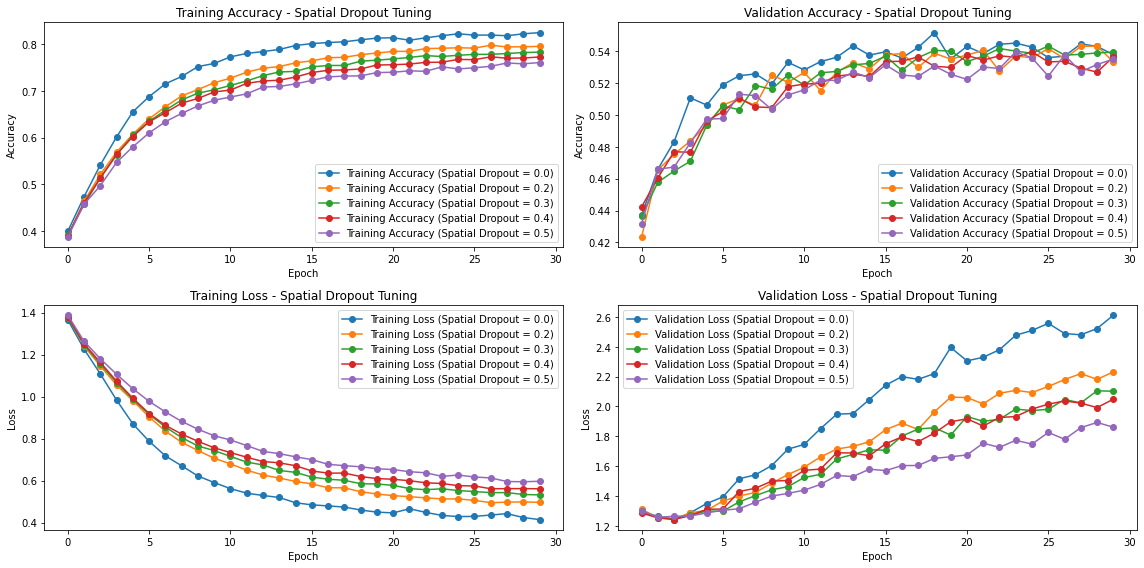

In [208]:
histories = [history_lstmBS4, history_lstmSDropout1, history_lstmSDropout2, history_lstmSDropout3, history_lstmSDropout4]
title = 'Spatial Dropout Tuning'
hyperparam_name = 'Spatial Dropout'
hyperparam_values = [0.0, 0.2, 0.3, 0.4, 0.5]

plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

In [233]:
evaluation_result = model_lstmBS4.evaluate(x_test, y_test, verbose=1)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

172/172 [==============================] - 2s 9ms/step - loss: 2.5482 - accuracy: 0.5493
Test Loss: 2.5481560230255127
Test Accuracy: 0.5492727160453796


In [234]:
evaluation_result = model_lstmSDropout4.evaluate(x_test, y_test, verbose=1)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

172/172 [==============================] - 2s 9ms/step - loss: 1.8245 - accuracy: 0.5435
Test Loss: 1.8245466947555542
Test Accuracy: 0.5434545278549194


### Determining the number of nodes in each layer

Let's use an analogy to show that the number of nodes in each layer influences model accuracy:
imagine we are building a tower. The goal is to build a structure that represents and understands different patterns. Hence each layer in the tower is our one layer in the neural network.

- Number of floors (layers): the more floors we have, the more complex our tower can be
- Number of rooms on each floor (nodes in a layer): on each floor we have multiple rooms (nodes in the network). 

If a tower only has a few floors, and each floor has a limited number of rooms, it is known as a shallow network. Hence the tower may struggle to capture all nuances and patterns, just like how the network struggles to capture complex patterns

If a tower has more floors and rooms, it results in it representing more diverse sets of patterns, and hence is a deeper network capturing and recognising intricate features of data


### Example of Shallow vs Deep Network
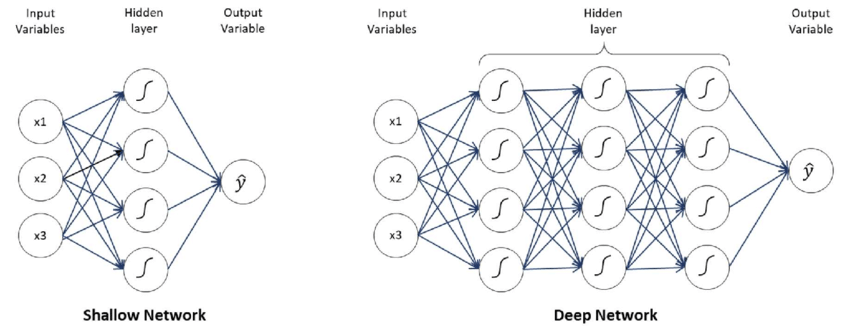

Hence it shows how a shallow vs deep network looks like

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

def create_lstm_model(num_nodes=32, dropout_rate=0.2):
    embedding_nodes = 50
    model_lstm = Sequential()
    model_lstm.add(Embedding(max_words, embedding_nodes, input_length=x_train.shape[1],
                             weights=[embedding_matrix], trainable=True))
    model_lstm.add(LSTM(num_nodes, return_sequences=True))
    model_lstm.add(SpatialDropout1D(dropout_rate))  # Spatial Dropout layer for 1D sequences
    model_lstm.add(LSTM(num_nodes))
    #model_lstm.add(SpatialDropout1D(dropout_rate))  # Spatial Dropout layer for 1D sequences
    model_lstm.add(Dense(5, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.005)
    
    model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model_lstm


In [237]:
model_lstm_numNodes1 = create_lstm_model(num_nodes=64, dropout_rate=0.5)
model_lstm_numNodes1.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_57 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_55 (LSTM)              (None, 50, 64)            29440     
                                                                 
 spatial_dropout1d_6 (Spati  (None, 50, 64)            0         
 alDropout1D)                                                    
                                                                 
 lstm_56 (LSTM)              (None, 64)                33024     
                                                                 
 dense_49 (Dense)            (None, 5)                 325       
                                                                 
Total params: 812789 (3.10 MB)
Trainable params: 812789 (3.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [241]:
model_lstm_numNodes2 = create_lstm_model(num_nodes=128, dropout_rate=0.5)
model_lstm_numNodes2.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_61 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_63 (LSTM)              (None, 50, 128)           91648     
                                                                 
 spatial_dropout1d_10 (Spat  (None, 50, 128)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_64 (LSTM)              (None, 128)               131584    
                                                                 
 dense_53 (Dense)            (None, 5)                 645       
                                                                 
Total params: 973877 (3.72 MB)
Trainable params: 973877 (3.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [166]:
model_lstm_numNodes3 = create_lstm_model(num_nodes=256, dropout_rate=0.5)
model_lstm_numNodes3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 50)            750000    
                                                                 
 lstm_4 (LSTM)               (None, 50, 256)           314368    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 50, 256)           0         
 alDropout1D)                                                    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 1590965 (6.07 MB)
Trainable params: 1590965 (6.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [248]:
model_lstm_numNodes4 = create_lstm_model(num_nodes=512, dropout_rate=0.5)
model_lstm_numNodes4.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_62 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_65 (LSTM)              (None, 50, 512)           1153024   
                                                                 
 spatial_dropout1d_11 (Spat  (None, 50, 512)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_66 (LSTM)              (None, 512)               2099200   
                                                                 
 dense_54 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 4004789 (15.28 MB)
Trainable params: 4004789 (15.28 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [242]:
# Train the model with validation data
history_lstm_numNodes1 = model_lstm_numNodes1.fit(x_train, y_train, validation_split=0.2,
                              epochs=20, batch_size=128)

Epoch 1/20
138/138 [==============================] - 15s 85ms/step - loss: 1.3701 - accuracy: 0.3972 - val_loss: 1.2860 - val_accuracy: 0.4386
Epoch 2/20
138/138 [==============================] - 11s 78ms/step - loss: 1.2514 - accuracy: 0.4601 - val_loss: 1.2566 - val_accuracy: 0.4573
Epoch 3/20
138/138 [==============================] - 12s 89ms/step - loss: 1.1613 - accuracy: 0.5133 - val_loss: 1.2541 - val_accuracy: 0.4661
Epoch 4/20
138/138 [==============================] - 13s 94ms/step - loss: 1.0714 - accuracy: 0.5630 - val_loss: 1.2756 - val_accuracy: 0.4830
Epoch 5/20
138/138 [==============================] - 12s 89ms/step - loss: 0.9899 - accuracy: 0.5988 - val_loss: 1.2865 - val_accuracy: 0.4941
Epoch 6/20
138/138 [==============================] - 12s 90ms/step - loss: 0.9133 - accuracy: 0.6336 - val_loss: 1.3509 - val_accuracy: 0.5016
Epoch 7/20
138/138 [==============================] - 12s 90ms/step - loss: 0.8639 - accuracy: 0.6564 - val_loss: 1.3364 - val_accuracy:

In [243]:
# Train the model with validation data
history_lstm_numNodes2 = model_lstm_numNodes2.fit(x_train, y_train, validation_split=0.2,
                              epochs=20, batch_size=128)

Epoch 1/20
138/138 [==============================] - 32s 202ms/step - loss: 1.3695 - accuracy: 0.3921 - val_loss: 1.2821 - val_accuracy: 0.4418
Epoch 2/20
138/138 [==============================] - 27s 194ms/step - loss: 1.2451 - accuracy: 0.4624 - val_loss: 1.2478 - val_accuracy: 0.4650
Epoch 3/20
138/138 [==============================] - 27s 193ms/step - loss: 1.1486 - accuracy: 0.5210 - val_loss: 1.2582 - val_accuracy: 0.4595
Epoch 4/20
138/138 [==============================] - 27s 196ms/step - loss: 1.0507 - accuracy: 0.5702 - val_loss: 1.2771 - val_accuracy: 0.4864
Epoch 5/20
138/138 [==============================] - 27s 193ms/step - loss: 0.9516 - accuracy: 0.6123 - val_loss: 1.3196 - val_accuracy: 0.5041
Epoch 6/20
138/138 [==============================] - 27s 194ms/step - loss: 0.8737 - accuracy: 0.6470 - val_loss: 1.3554 - val_accuracy: 0.5039
Epoch 7/20
138/138 [==============================] - 27s 193ms/step - loss: 0.8167 - accuracy: 0.6697 - val_loss: 1.3919 - val_ac

In [167]:
# Train the model with validation data
history_lstm_numNodes3 = model_lstm_numNodes3.fit(x_train, y_train, validation_split=0.2,
                              epochs=20, batch_size=128)

Epoch 1/20
138/138 [==============================] - 55s 380ms/step - loss: 1.3716 - accuracy: 0.3994 - val_loss: 1.2656 - val_accuracy: 0.4457
Epoch 2/20
138/138 [==============================] - 53s 383ms/step - loss: 1.2324 - accuracy: 0.4714 - val_loss: 1.2536 - val_accuracy: 0.4552
Epoch 3/20
138/138 [==============================] - 57s 412ms/step - loss: 1.1387 - accuracy: 0.5218 - val_loss: 1.2367 - val_accuracy: 0.4782
Epoch 4/20
138/138 [==============================] - 49s 353ms/step - loss: 1.0300 - accuracy: 0.5765 - val_loss: 1.2443 - val_accuracy: 0.4980
Epoch 5/20
138/138 [==============================] - 47s 341ms/step - loss: 0.9336 - accuracy: 0.6206 - val_loss: 1.3031 - val_accuracy: 0.5145
Epoch 6/20
138/138 [==============================] - 49s 354ms/step - loss: 0.8587 - accuracy: 0.6547 - val_loss: 1.3620 - val_accuracy: 0.5125
Epoch 7/20
138/138 [==============================] - 47s 344ms/step - loss: 0.7939 - accuracy: 0.6780 - val_loss: 1.3701 - val_ac

In [249]:
# Train the model with validation data
history_lstm_numNodes4 = model_lstm_numNodes4.fit(x_train, y_train, validation_split=0.2,
                              epochs=20, batch_size=128)

Epoch 1/20
138/138 [==============================] - 146s 1s/step - loss: 1.3902 - accuracy: 0.3812 - val_loss: 1.2859 - val_accuracy: 0.4427
Epoch 2/20
138/138 [==============================] - 154s 1s/step - loss: 1.2472 - accuracy: 0.4577 - val_loss: 1.2789 - val_accuracy: 0.4534
Epoch 3/20
138/138 [==============================] - 153s 1s/step - loss: 1.1951 - accuracy: 0.5110 - val_loss: 1.4454 - val_accuracy: 0.3675
Epoch 4/20
138/138 [==============================] - 140s 1s/step - loss: 1.1630 - accuracy: 0.5161 - val_loss: 1.2765 - val_accuracy: 0.4800
Epoch 5/20
138/138 [==============================] - 145s 1s/step - loss: 1.0031 - accuracy: 0.5916 - val_loss: 1.2769 - val_accuracy: 0.4952
Epoch 6/20
138/138 [==============================] - 144s 1s/step - loss: 0.9119 - accuracy: 0.6330 - val_loss: 1.3245 - val_accuracy: 0.5032
Epoch 7/20
138/138 [==============================] - 141s 1s/step - loss: 0.8385 - accuracy: 0.6636 - val_loss: 1.4005 - val_accuracy: 0.5084

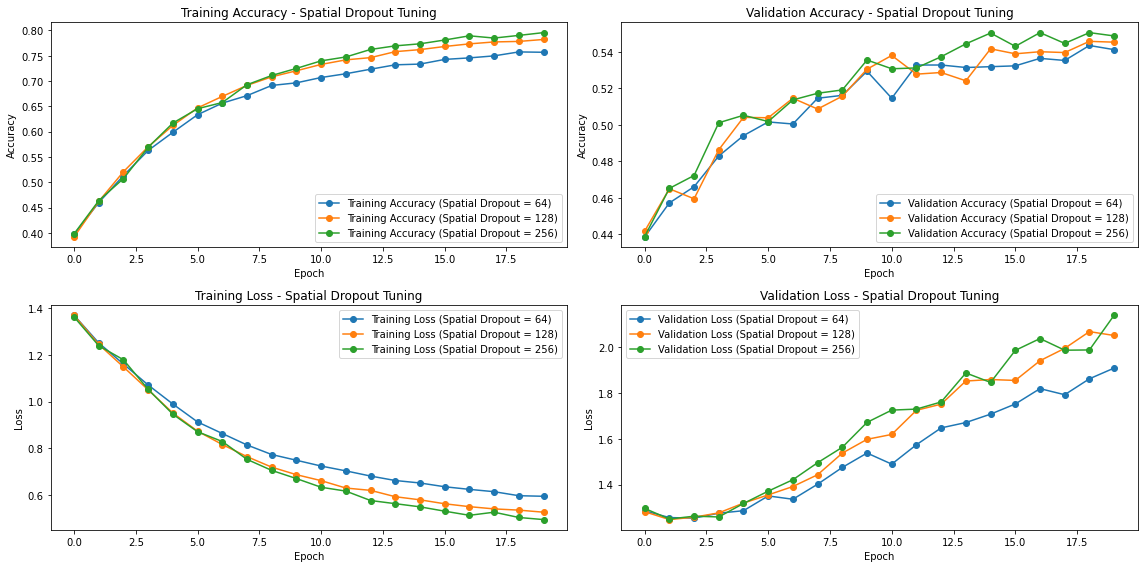

In [247]:
histories = [history_lstm_numNodes1, history_lstm_numNodes2, history_lstm_numNodes3]
title = 'Spatial Dropout Tuning'
hyperparam_name = 'Spatial Dropout'
hyperparam_values = [64, 128, 256]

plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

In [250]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

def create_lstm_model(num_nodes=32, dropout_rate=0.2):
    embedding_nodes = 50
    model_lstm = Sequential()
    model_lstm.add(Embedding(max_words, embedding_nodes, input_length=x_train.shape[1],
                             weights=[embedding_matrix], trainable=True))
    model_lstm.add(LSTM(num_nodes, return_sequences=True))
    model_lstm.add(SpatialDropout1D(dropout_rate))  # Spatial Dropout layer for 1D sequences
    model_lstm.add(LSTM(num_nodes, return_sequences=True))
    model_lstm.add(SpatialDropout1D(dropout_rate))  # Spatial Dropout layer for 1D sequences
    model_lstm.add(LSTM(num_nodes))
    #model_lstm.add(SpatialDropout1D(dropout_rate))  # Spatial Dropout layer for 1D sequences
    model_lstm.add(Dense(5, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.005)
    
    model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model_lstm


In [251]:
model_lstm_layers1 = create_lstm_model(num_nodes=128, dropout_rate=0.5)
model_lstm_layers1.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_63 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_67 (LSTM)              (None, 50, 128)           91648     
                                                                 
 spatial_dropout1d_12 (Spat  (None, 50, 128)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_68 (LSTM)              (None, 50, 128)           131584    
                                                                 
 spatial_dropout1d_13 (Spat  (None, 50, 128)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_69 (LSTM)              (None, 128)             

In [252]:
model_lstm_layers2 = create_lstm_model(num_nodes=256, dropout_rate=0.5)
model_lstm_layers2.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_64 (Embedding)    (None, 50, 50)            750000    
                                                                 
 lstm_70 (LSTM)              (None, 50, 256)           314368    
                                                                 
 spatial_dropout1d_14 (Spat  (None, 50, 256)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_71 (LSTM)              (None, 50, 256)           525312    
                                                                 
 spatial_dropout1d_15 (Spat  (None, 50, 256)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_72 (LSTM)              (None, 256)             

In [253]:
# Train the model with validation data
history_lstm_layers1 = model_lstm_layers1.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=128)

Epoch 1/30
138/138 [==============================] - 45s 294ms/step - loss: 1.3899 - accuracy: 0.3849 - val_loss: 1.2944 - val_accuracy: 0.4273
Epoch 2/30
138/138 [==============================] - 40s 290ms/step - loss: 1.2740 - accuracy: 0.4465 - val_loss: 1.2622 - val_accuracy: 0.4609
Epoch 3/30
138/138 [==============================] - 40s 293ms/step - loss: 1.2026 - accuracy: 0.4822 - val_loss: 1.2812 - val_accuracy: 0.4518
Epoch 4/30
138/138 [==============================] - 40s 292ms/step - loss: 1.1242 - accuracy: 0.5366 - val_loss: 1.2672 - val_accuracy: 0.4691
Epoch 5/30
138/138 [==============================] - 40s 293ms/step - loss: 1.0542 - accuracy: 0.5717 - val_loss: 1.2830 - val_accuracy: 0.4891
Epoch 6/30
138/138 [==============================] - 40s 291ms/step - loss: 0.9935 - accuracy: 0.6031 - val_loss: 1.2840 - val_accuracy: 0.4934
Epoch 7/30
138/138 [==============================] - 40s 294ms/step - loss: 0.9440 - accuracy: 0.6244 - val_loss: 1.3488 - val_ac

In [254]:
# Train the model with validation data
history_lstm_layers2 = model_lstm_layers2.fit(x_train, y_train, validation_split=0.2,
                              epochs=30, batch_size=128)

Epoch 1/30
138/138 [==============================] - 120s 839ms/step - loss: 1.4122 - accuracy: 0.3727 - val_loss: 1.3318 - val_accuracy: 0.3973
Epoch 2/30
138/138 [==============================] - 117s 847ms/step - loss: 1.2813 - accuracy: 0.4370 - val_loss: 1.2867 - val_accuracy: 0.4530
Epoch 3/30
138/138 [==============================] - 116s 844ms/step - loss: 1.2023 - accuracy: 0.4866 - val_loss: 1.2642 - val_accuracy: 0.4693
Epoch 4/30
138/138 [==============================] - 116s 842ms/step - loss: 1.1190 - accuracy: 0.5351 - val_loss: 1.2548 - val_accuracy: 0.4768
Epoch 5/30
138/138 [==============================] - 116s 838ms/step - loss: 1.0397 - accuracy: 0.5756 - val_loss: 1.2700 - val_accuracy: 0.4948
Epoch 6/30
138/138 [==============================] - 116s 845ms/step - loss: 1.0386 - accuracy: 0.5817 - val_loss: 1.3171 - val_accuracy: 0.4982
Epoch 7/30
138/138 [==============================] - 116s 843ms/step - loss: 0.9295 - accuracy: 0.6274 - val_loss: 1.3428 -

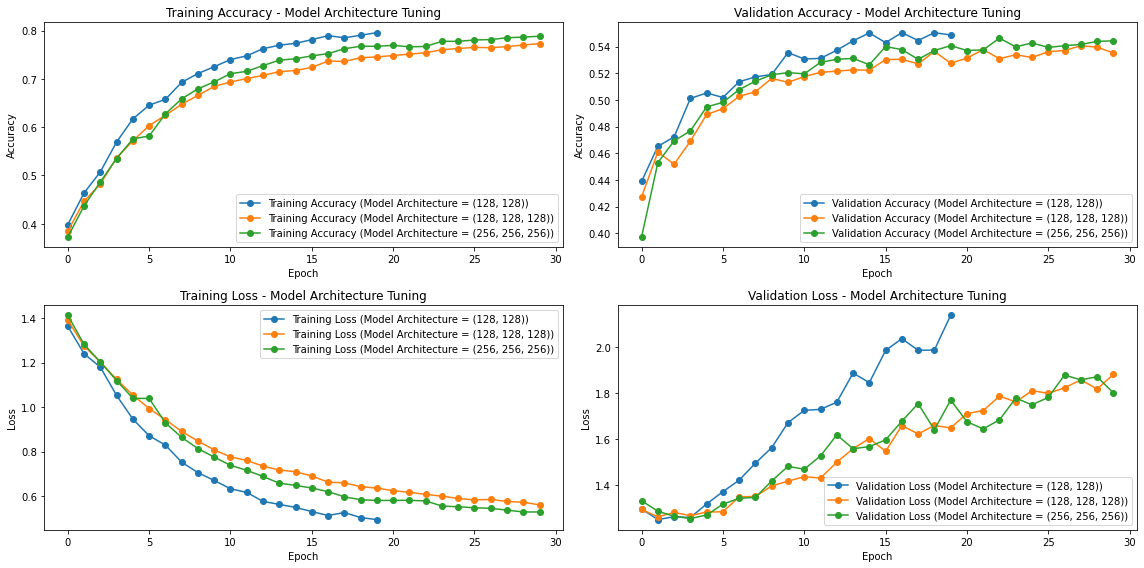

In [256]:
histories = [history_lstm_numNodes3, history_lstm_layers1, history_lstm_layers2]
title = 'Model Architecture Tuning'
hyperparam_name = 'Model Architecture'
hyperparam_values = [(128, 128), (128, 128, 128), (256, 256, 256)]

plotFromHistories(histories, title, hyperparam_name, hyperparam_values)

### Evaluating Final Model

In [173]:
evaluation_result = model_lstm_numNodes3.evaluate(x_test, y_test, verbose=1)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

172/172 [==============================] - 9s 52ms/step - loss: 1.9430 - accuracy: 0.5625
Test Loss: 1.943032145500183
Test Accuracy: 0.5625454783439636


In [179]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert predicted scores to class labels (indices of maximum values)
predicted_labels = np.argmax(predicted_scores, axis=1)

# Convert class labels to one-hot encoded format
one_hot_predicted = to_categorical(predicted_labels, num_classes=num_classes)

# Print the shape of the one-hot encoded predictions
print("Shape of One-Hot Encoded Predictions:", one_hot_predicted.shape)

# Access the one-hot encoded predictions for the first sample
print("One-Hot Encoded Predictions for the First Sample:", one_hot_predicted[0])


Shape of One-Hot Encoded Predictions: (5500, 5)
One-Hot Encoded Predictions for the First Sample: [0. 0. 0. 0. 1.]


In [181]:
one_hot_predicted

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

### Saving the Model in h5 Files

In [169]:
model_path = 'C:\\Users\\user\\Documents\\DL\\DL Asg 2\\model_lstm_numNodes3.h5'
model_lstm_numNodes3.save(model_path)

C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Using Confusion Matrix to Compare Results

A confusion matrix is a way to summarise the classifier's performance, in this case, our final model. We use tables to show which are the reviews it predicted correctly, and which ones wrongly. A basic representation is of the model compared to the true values:

https://github.com/izzyx6/Sentiment-Analysis-Google-Play-Store-Review/blob/master/playstore.ipynb

Given a smiple example of confusion matrix, but in another context:

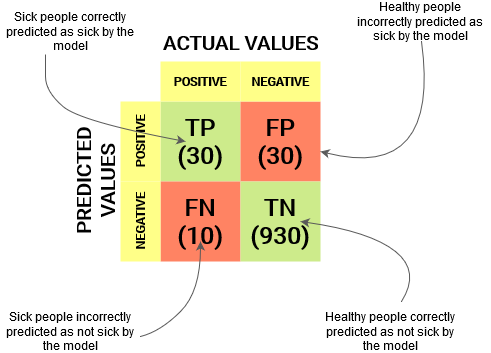

- True positive refers to the sick people correctly predicted by the model. 
- False positive refers to the healthy people incorrectly predicted as sick, by the model
- False negative refers to the sick people that are incorrectly predicted as sick by the model
- True negative refers to healthy people correctly predicted as not sick by the model

Hence, given this analogy, let's look at the specific context of Google Play Reviews:

The y axis refers to actual classes, whereas the x axis refers to the predicted classes of the reviews. Then, there are different classes of 1,2,3,4 and 5 star reviews, and the model now tries to put the data point, into any of the groups in the x axis, and the answers, or y pred, are at the y axis.

### Converting one hot encoded variables into original classes
First, we try to convert one hot encoded target variable, into classes (original). As the confusion matrix does not allow the use of OHE.

In [184]:
predicted_classes = np.argmax(one_hot_predicted, axis=1)
predicted_classes

array([4, 2, 3, ..., 0, 4, 1], dtype=int64)

In [186]:
actual_classes = np.argmax(y_test, axis=1)
actual_classes

array([1, 3, 3, ..., 0, 2, 1], dtype=int64)

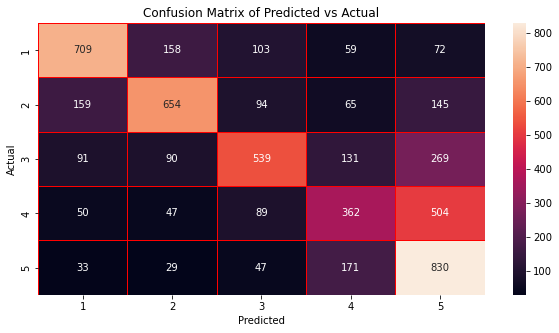

In [191]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(actual_classes, predicted_classes) #y test, y pred
side_bar = ["1", "2", "3", "4", "5"]

f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True, linewidth=.5, linecolor="r", fmt=".0f", ax=ax)

ax.set_xticklabels(side_bar)
ax.set_yticklabels(side_bar)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.set_title('Confusion Matrix of Predicted vs Actual')
plt.show()


Sadly, it was close that the model misclassifies about 500 reviews, under 5 stars, when it was only a 4 star review. Hence, it could have been the cause of the model's accuracy to drop.

The accuracy is calculated as:
$$ accuracy = \frac{SumOfCorrectPreds}{TotalPreds} = 0.56$$

### Further Improvements

We could explore more hyperparameters to push the validation accuracy up, to be the same as training accuracy. This is done by:
- Introducing L1/L2 regularisation. Regularisation techniques are used to prevent overfitting by adding penalty terms to loss function. A simpler explanation is explained in the report
- Cross validation helps access model performance and generalisation ability, by splitting dataset into multiple subsets for training and validation. We can try to divide it to k subsets, or folds, and model is trained and validated k number of times. This can improve model accuracy (more is explained in report)